<a href="https://colab.research.google.com/github/Thipwadee/Project2/blob/main/7_TSV_Clf_Models_Explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from pandas.api.types import  CategoricalDtype

# machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.inspection import PartialDependenceDisplay


In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
df_encoded = pd.read_excel('/content/Cleaned_Thermal_Data.xlsx', sheet_name='sheet_2', usecols=lambda x: 'Unnamed' not in x,)
df_encoded

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,อุณหภูมิ,ความชื้น,กระแสลม,...,Clo,Met,พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้,พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง,พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม,พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร,seasons_summer,seasons_winter,เพศ_ชาย,เพศ_หญิง
0,27,17.156262,30.5,42.9,0.13,Accept,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,Accept,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,Accept,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,Accept,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,Accept,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,Accept,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,Unaccept,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,Accept,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,Accept,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [ ]:
df_encoded.rename(columns = {'เพศ_หญิง':'เพศหญิง','เพศ_ชาย' : 'เพศชาย', 'seasons_summer' : 'summer', 'seasons_winter' : 'winter', 'พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้' : 'ใต้ร่มไม้', 'พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง' : 'กลางแจ้ง',
                       'พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม' : 'มีหลังคาคลุม', 'พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร' : 'ภายใต้อาคาร', 'อุณหภูมิ' : 'ความรู้สึกถึงอุณหภูมิ', 'ความชื้น' : 'ความรู้สึกถึงความชื้น',
                       'กระแสลม' : 'ความรู้สึกถึงกระแสลม','ความแรงของแสงแดด' : 'ความรู้สึกถึงแสงแดด','เหงื่อบริเวณผิวหนัง' : 'ความรู้สึกถึงเหงื่อ', 'ความร้อน' : 'ความต้องการอุณหภูมิ','ความชื้น.1' : 'ความต้องการความชื้น', 'กระแสลม.1': 'ความต้องการกระแสลม', 'แสงแดด' : 'ความต้องการแสงแดด',
                       'เหงื่อบริเวณผิวหนัง.1': 'ความต้องการเหงื่อ'}, inplace = True)
df_encoded

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,ความรู้สึกถึงอุณหภูมิ,ความรู้สึกถึงความชื้น,ความรู้สึกถึงกระแสลม,...,Clo,Met,ใต้ร่มไม้,กลางแจ้ง,มีหลังคาคลุม,ภายใต้อาคาร,summer,winter,เพศชาย,เพศหญิง
0,27,17.156262,30.5,42.9,0.13,Accept,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,Accept,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,Accept,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,Accept,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,Accept,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,Accept,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,Unaccept,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,Accept,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,Accept,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     193 non-null    int64  
 1   BMI                     193 non-null    float64
 2   Temp                    193 non-null    float64
 3   RH                      193 non-null    float64
 4   V                       193 non-null    float64
 5   Thermal_acceptance      193 non-null    object 
 6   Thermal_sensation_Vote  193 non-null    int64  
 7   ความรู้สึกถึงอุณหภูมิ   193 non-null    int64  
 8   ความรู้สึกถึงความชื้น   193 non-null    int64  
 9   ความรู้สึกถึงกระแสลม    193 non-null    int64  
 10  ความรู้สึกถึงแสงแดด     193 non-null    int64  
 11  ความรู้สึกถึงเหงื่อ     193 non-null    int64  
 12  ความต้องการอุณหภูมิ     193 non-null    int64  
 13  ความต้องการความชื้น     193 non-null    int64  
 14  ความต้องการกระแสลม      193 non-null    in

In [ ]:
df = {'Accept':0, 'Unaccept':1}
df_encoded = df_encoded.copy()
for i in range(5,6):
  df_encoded.iloc[:,i] = df_encoded.iloc[:,i].map(df)
df_encoded

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,ความรู้สึกถึงอุณหภูมิ,ความรู้สึกถึงความชื้น,ความรู้สึกถึงกระแสลม,...,Clo,Met,ใต้ร่มไม้,กลางแจ้ง,มีหลังคาคลุม,ภายใต้อาคาร,summer,winter,เพศชาย,เพศหญิง
0,27,17.156262,30.5,42.9,0.13,0,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,0,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,0,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,0,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,0,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,0,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,1,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,0,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,0,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     193 non-null    int64  
 1   BMI                     193 non-null    float64
 2   Temp                    193 non-null    float64
 3   RH                      193 non-null    float64
 4   V                       193 non-null    float64
 5   Thermal_acceptance      193 non-null    int64  
 6   Thermal_sensation_Vote  193 non-null    int64  
 7   ความรู้สึกถึงอุณหภูมิ   193 non-null    int64  
 8   ความรู้สึกถึงความชื้น   193 non-null    int64  
 9   ความรู้สึกถึงกระแสลม    193 non-null    int64  
 10  ความรู้สึกถึงแสงแดด     193 non-null    int64  
 11  ความรู้สึกถึงเหงื่อ     193 non-null    int64  
 12  ความต้องการอุณหภูมิ     193 non-null    int64  
 13  ความต้องการความชื้น     193 non-null    int64  
 14  ความต้องการกระแสลม      193 non-null    in

#Spitt Data

In [ ]:
fo_mapping = {
    -2 :0,
    -1 :1,
    0 : 2,
    1 : 3,
    2 :4,
    3 :5,
}

df_encoded['TSV7'] = df_encoded['Thermal_sensation_Vote'].map(fo_mapping)

In [ ]:
X = df_encoded.drop(['Thermal_acceptance','TSV7','Thermal_sensation_Vote'], axis =1)
y = df_encoded['Thermal_acceptance']
y2 = df_encoded['TSV7']

#Models
##แบ่งข้อมูลโดยใช้ 5-fold แล้วจัดการ imbalance class ด้วย smote

#TSV

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# ตั้งค่าพารามิเตอร์สำหรับ K-Fold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# วนลูปผ่าน K-Fold
for train_index, test_index in kf.split(X):
    # แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]

    # ทำมาตรฐานข้อมูล
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)

    # ใช้ SMOTE สำหรับการทำ resampling ข้อมูลชุดฝึก
    smote = SMOTE(k_neighbors=2, random_state=42)
    X_train_res, y2_train_res = smote.fit_resample(X_train_scaled, y2_train)

    print(f"Training set size after resampling: {X_train_res.shape}")
    print(f"Test set size: {X_test_scaled.shape}")



Training set size after resampling: (270, 26)
Test set size: (39, 26)
Training set size after resampling: (306, 26)
Test set size: (39, 26)
Training set size after resampling: (288, 26)
Test set size: (39, 26)
Training set size after resampling: (270, 26)
Test set size: (38, 26)
Training set size after resampling: (288, 26)
Test set size: (38, 26)


#Logistics regression 7-TSV

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2'],
    'logisticregression__max_iter': [100, 200, 500, 1000],
    'logisticregression__solver': ['lbfgs', 'saga']
}

pipe = Pipeline(steps=[('scale', StandardScaler()), ('logisticregression', LogisticRegression())])
grid = GridSearchCV(pipe, param_grid, cv=5, refit=True, verbose=0)
grid.fit(X_train_res, y2_train_res)

print("Best parameters :", grid.best_params_)
print("Best accuracy :", grid.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters : {'logisticregression__C': 100, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Best accuracy : 0.9444041137326075


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters : {'logisticregression__C': 100, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Best accuracy : 0.9444041137326075

In [ ]:
Log_reg = LogisticRegression(C= 100, max_iter=100, penalty= 'l2', solver= 'lbfgs')

# Train the model
result = Log_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y2_pred = Log_reg.predict(X_test_scaled)
print(confusion_matrix(y2_test,y2_pred))
print(classification_report(y2_test,y2_pred))

[[0 0 0 0 0 0]
 [0 6 2 1 0 0]
 [0 1 4 3 1 2]
 [1 1 2 5 0 0]
 [0 0 0 2 1 2]
 [0 0 0 0 0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.75      0.67      0.71         9
           2       0.50      0.36      0.42        11
           3       0.45      0.56      0.50         9
           4       0.50      0.20      0.29         5
           5       0.50      1.00      0.67         4

    accuracy                           0.53        38
   macro avg       0.45      0.46      0.43        38
weighted avg       0.55      0.53      0.52        38



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
X does not have valid feature names, but LogisticRegression was fitted with feature names
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


#coef

In [ ]:
coeff=Log_reg.coef_[0].round(4)
coeff


array([-1.2793, -5.9661, -3.5752, -1.3866,  0.226 , -1.7215, -5.6361,
        5.0443, -1.499 ,  0.4931,  1.5515, -0.8693,  1.8456,  0.2241,
        0.1314, -5.4544, -0.    ,  0.    , -2.0434,  1.1882,  1.1722,
       -0.8464,  0.2206, -0.2206, -4.4922,  4.4922])

In [ ]:
Log_reg.intercept_

array([-13.84990558,   3.189588  ,  16.84647644,  16.77014718,
         0.2383311 , -23.19463714])

In [ ]:
log_summary=pd.DataFrame({"features":X.columns, "Coefficients":coeff})
log_summary.sort_values(["Coefficients"], ascending= False)
log_summary

,features,Coefficients
0,Age,-1.2793
1,BMI,-5.9661
2,Temp,-3.5752
3,RH,-1.3866
4,V,0.2260
5,ความรู้สึกถึงอุณหภูมิ,-1.7215
6,ความรู้สึกถึงความชื้น,-5.6361
7,ความรู้สึกถึงกระแสลม,5.0443
8,ความรู้สึกถึงแสงแดด,-1.4990
9,ความรู้สึกถึงเหงื่อ,0.4931


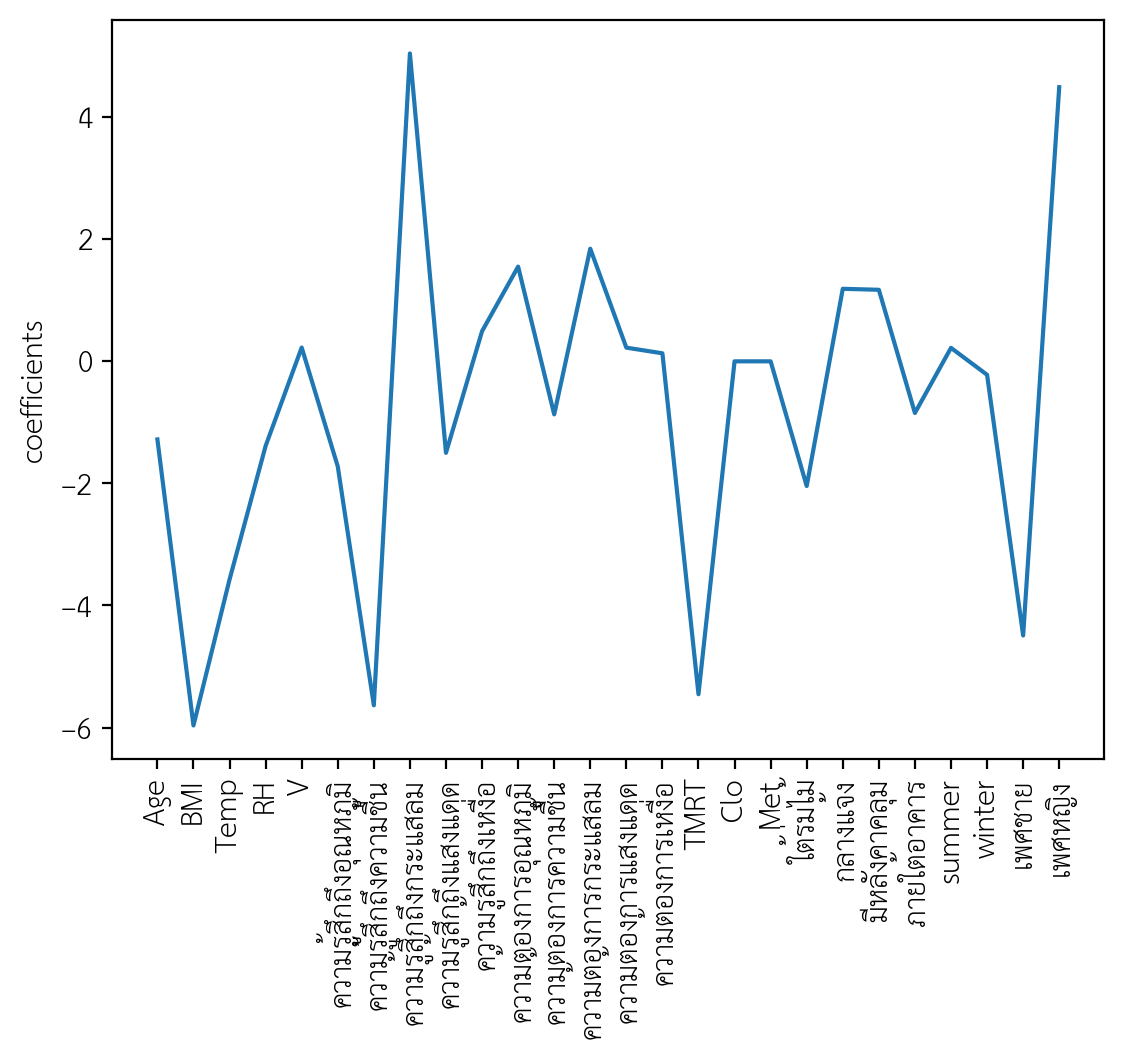

In [ ]:
_=plt.plot(range(len(X.columns)),coeff)
_=plt.xticks(range(len(X.columns)),X.columns,rotation=90)
_=plt.ylabel("coefficients")
plt.show()

In [ ]:
!pip install shap
import shap

In [ ]:
class_names = [0,1,2,3,4,5]

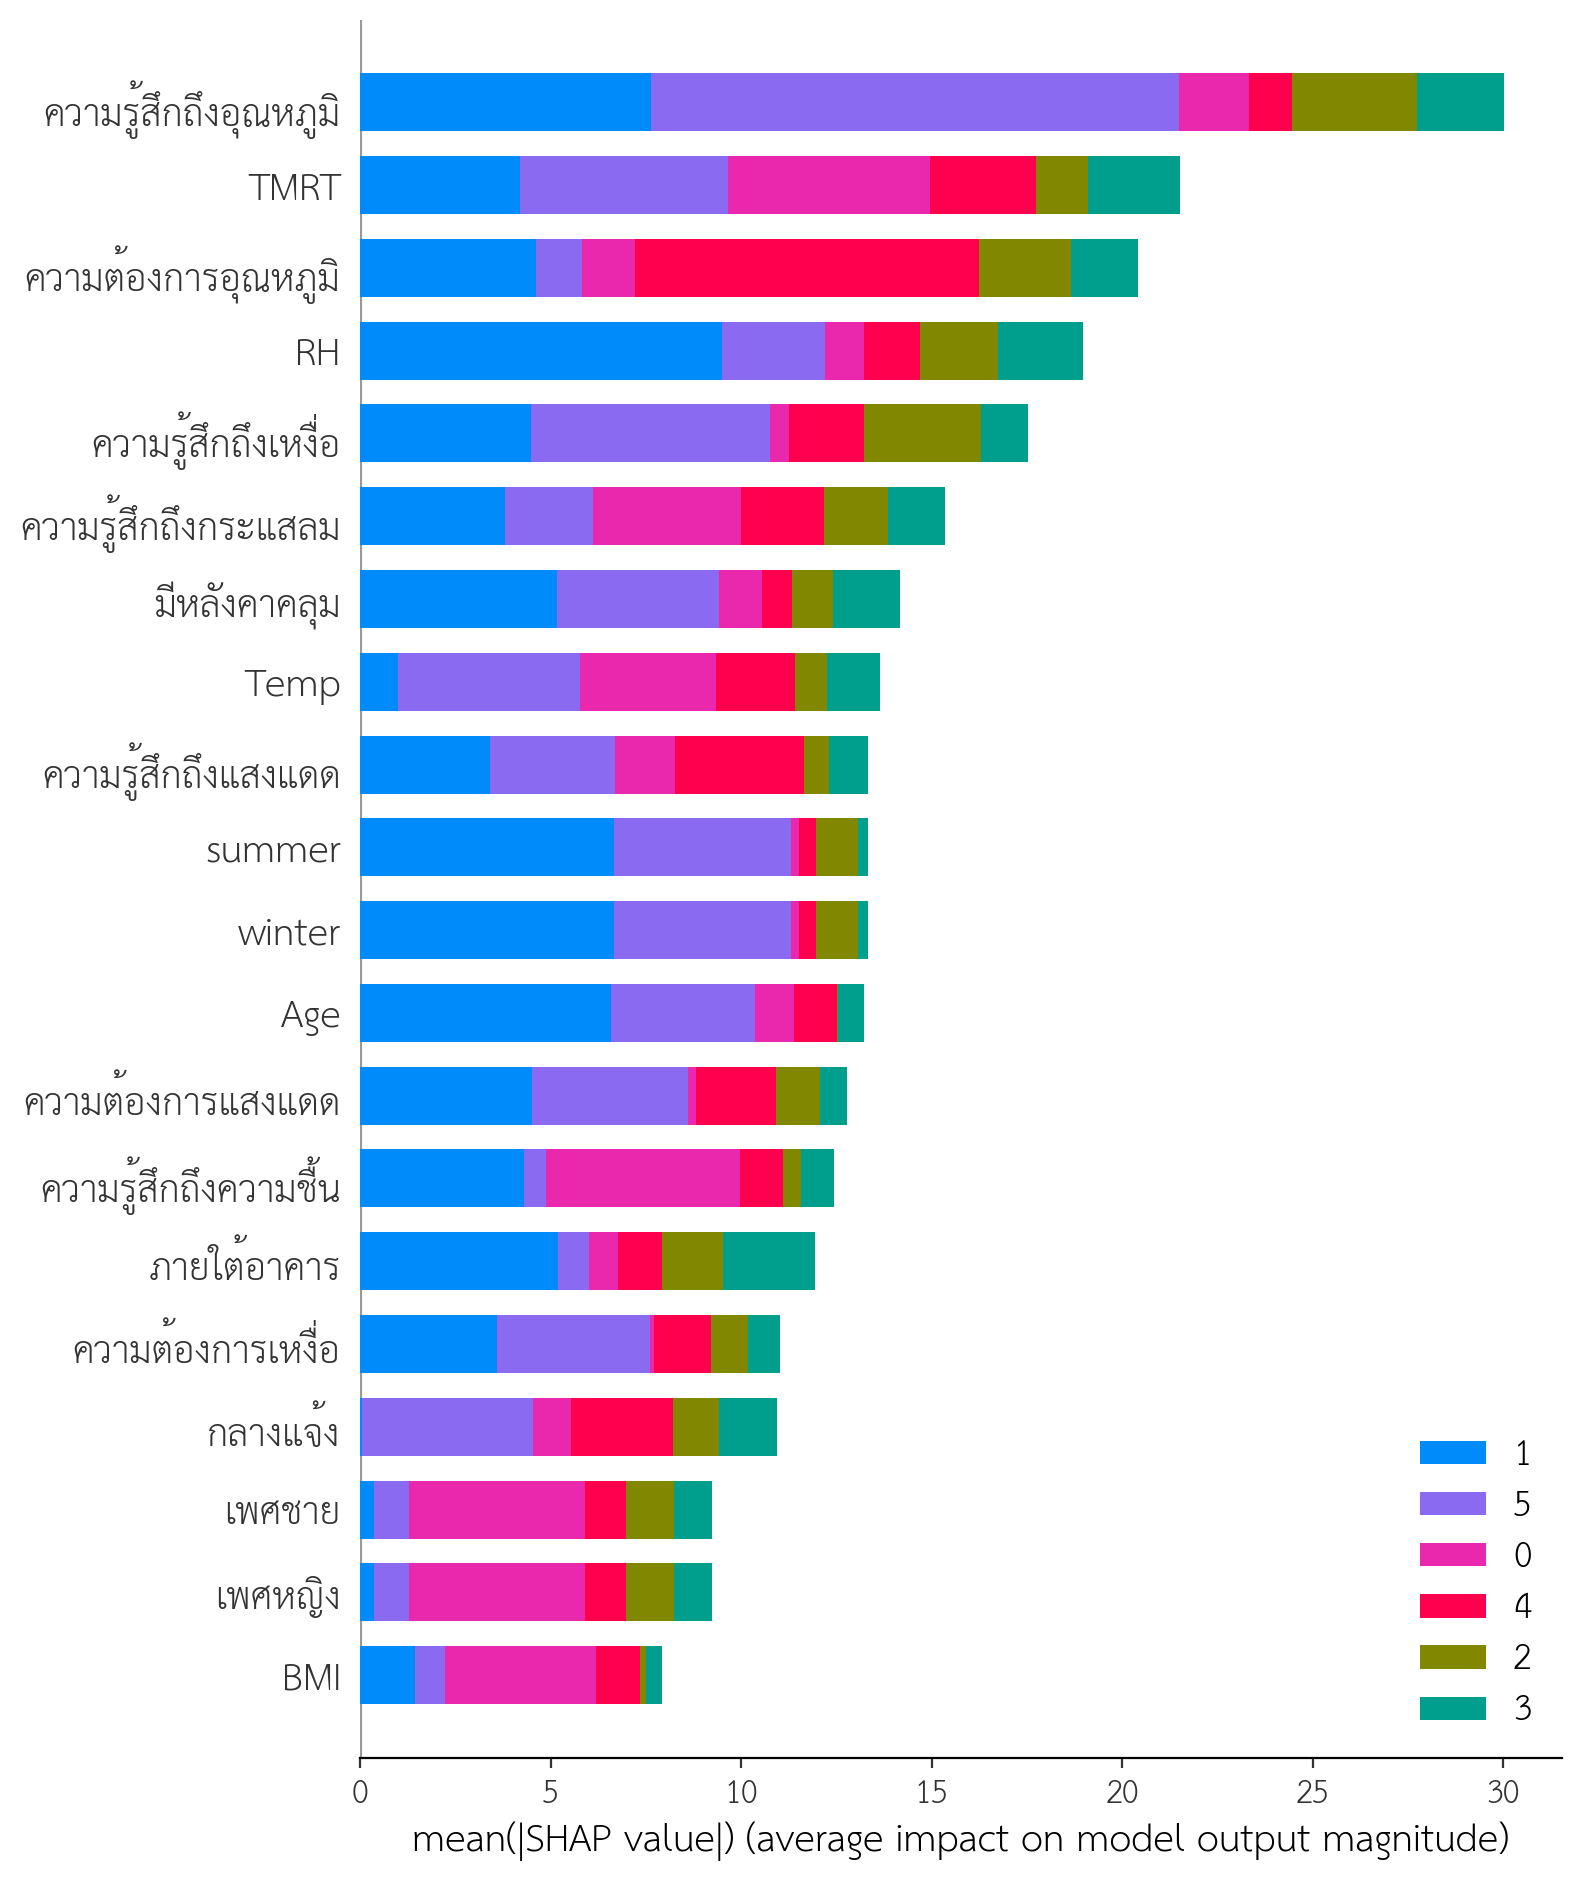

In [ ]:
masker = shap.maskers.Independent(data = X_train_res)
# SHAP Interpreter
shapExplainer = shap.LinearExplainer(result,masker=masker)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_train_res.values, plot_type = 'bar', class_names= class_names, feature_names = X_train_res.columns)


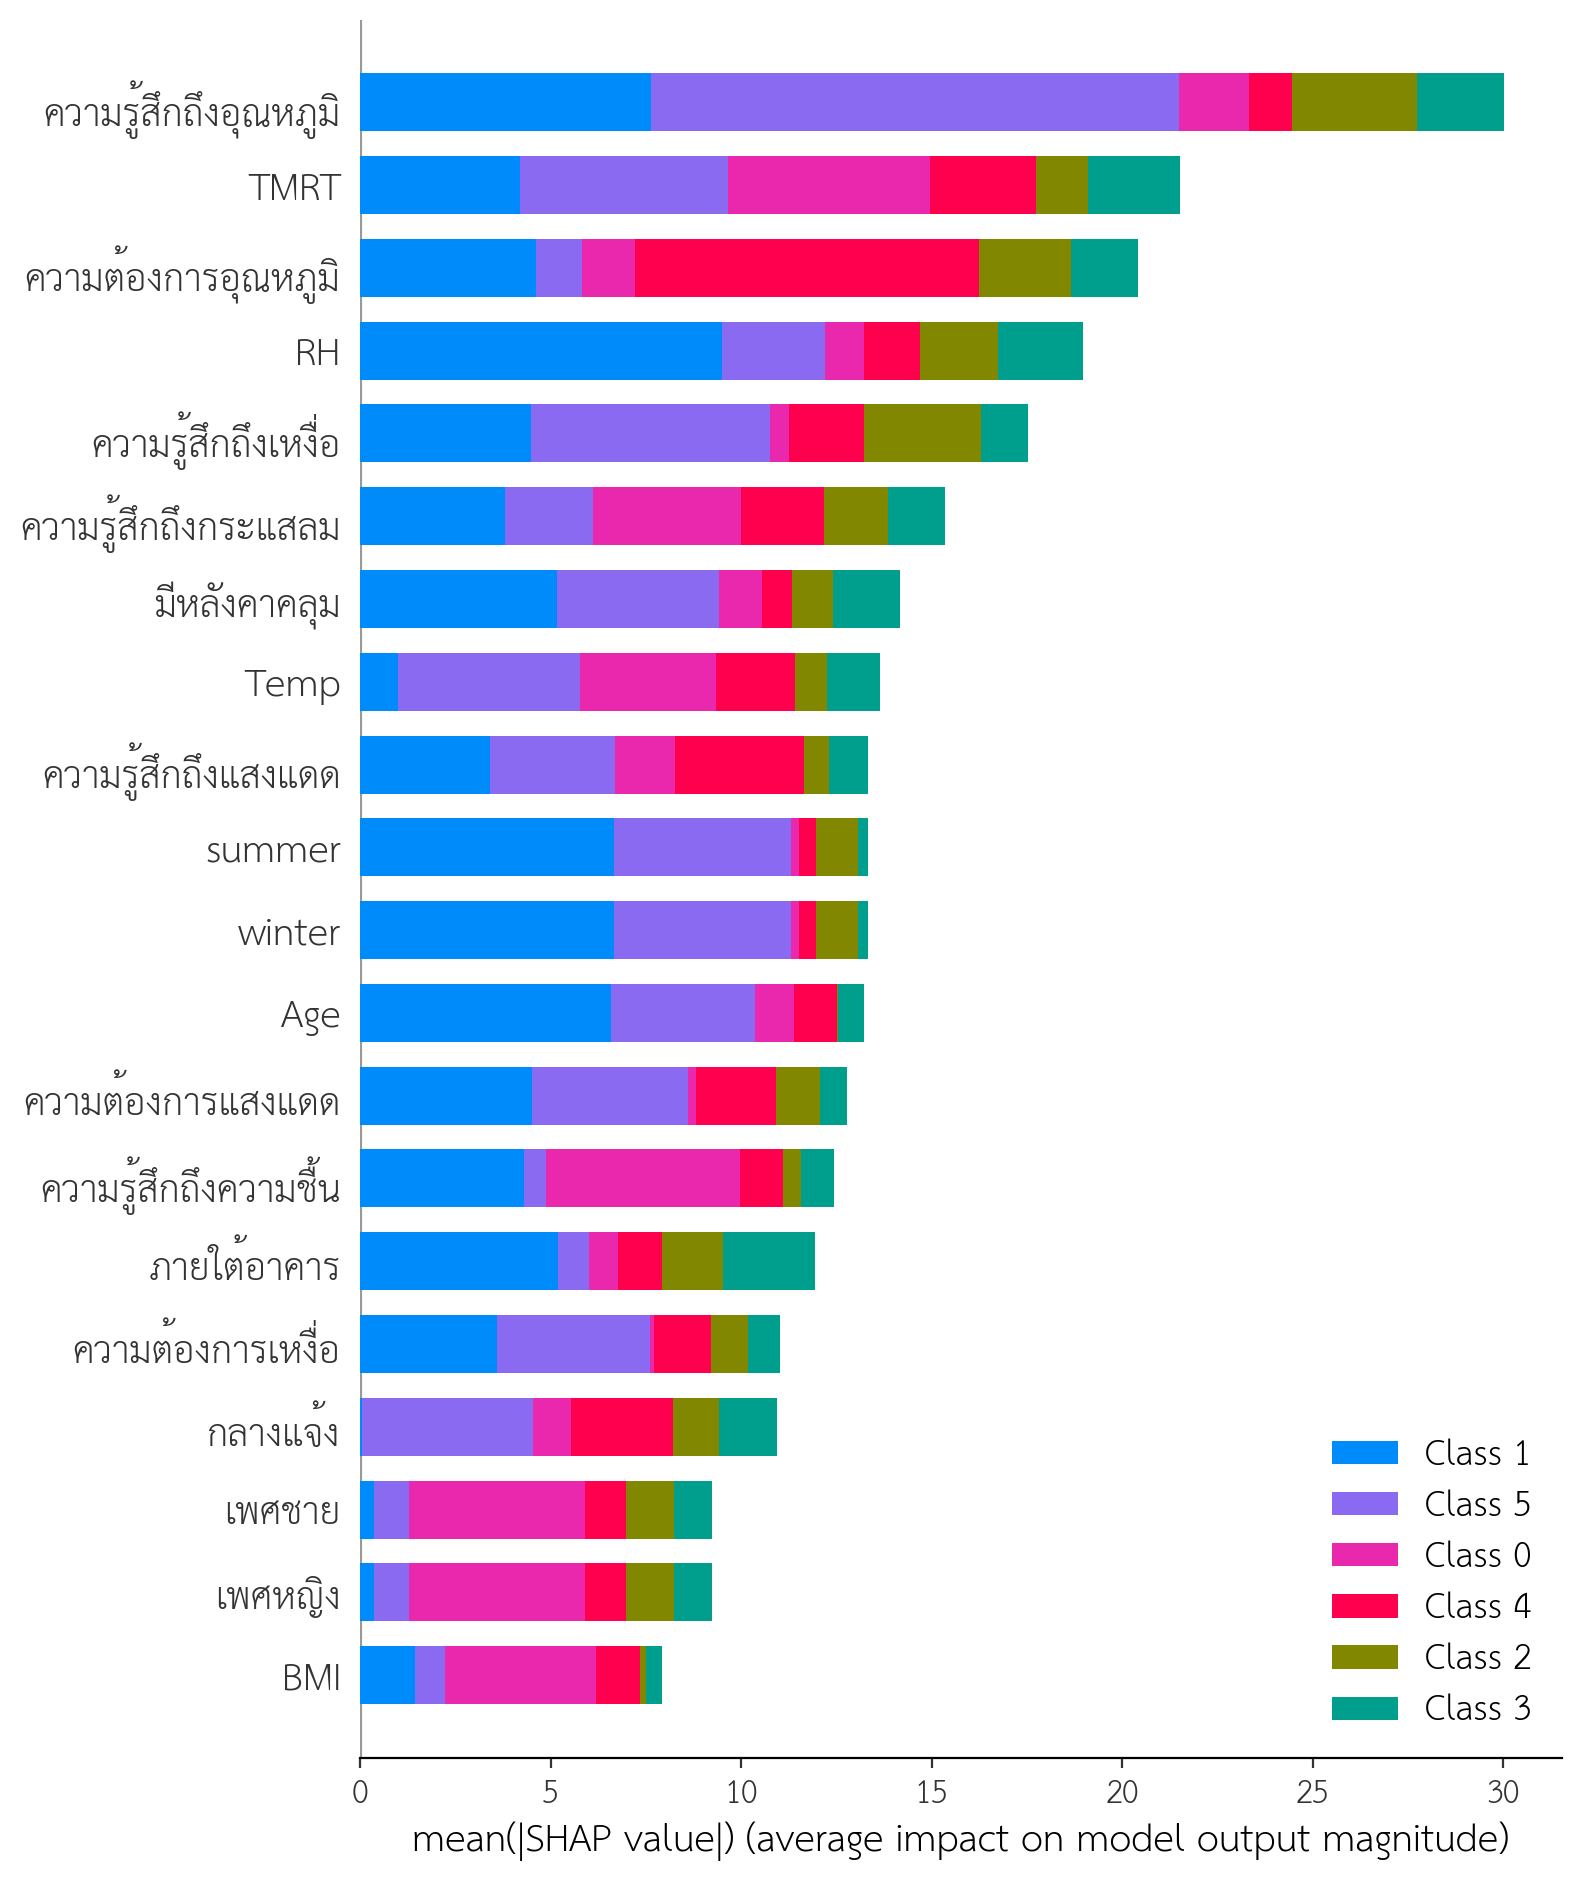

In [ ]:
shap.summary_plot(shapValues, X_train_res)

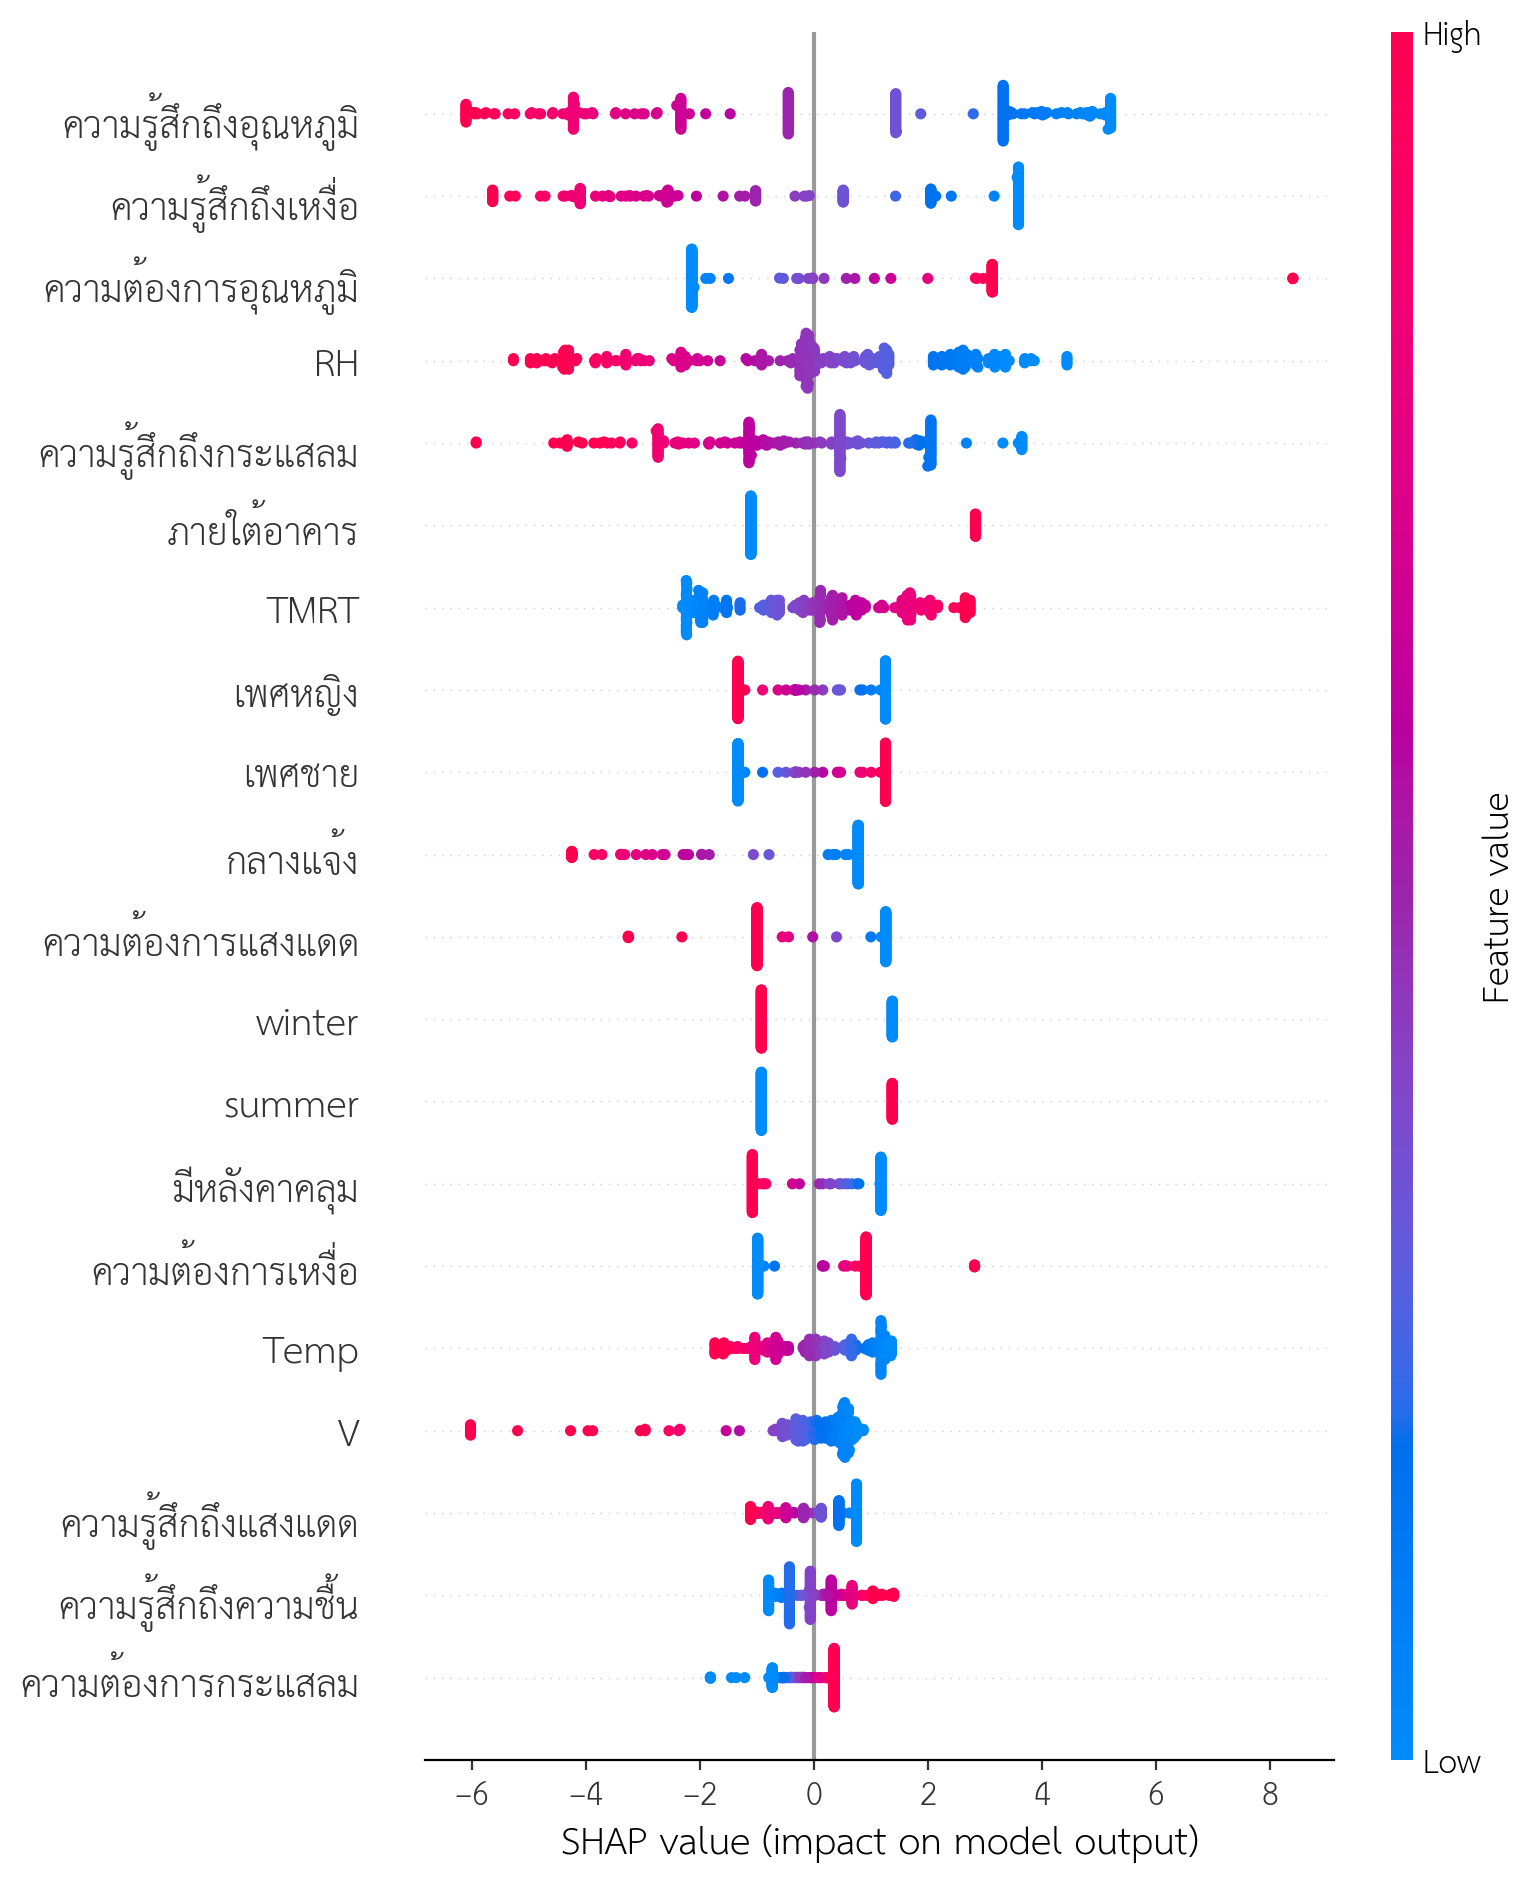

In [ ]:
shap.summary_plot(shapValues[2], X_train_res.values, feature_names = X_train_res.columns)

#Random forest 7-TSV

In [ ]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7],'criterion':['gini', 'entropy', 'log_loss']}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
rf_grid.fit(X_train_res, y2_train_res)
print("best_params :",rf_grid.best_params_)
print("accuracy :",rf_grid.best_score_)

best_params : {'criterion': 'entropy', 'max_depth': 5, 'max_features': 9, 'min_samples_split': 6, 'n_estimators': 50}
accuracy : 1.0


In [ ]:
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 5, max_features= 9, min_samples_split= 6, n_estimators= 50)

result = rf.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = rf.predict(X_test_scaled)
print(confusion_matrix(y2_test,y_pred))
print(classification_report(y2_test,y_pred))
print(dict(zip(X.columns,rf.feature_importances_.round(2))))

[[6 2 1 0 0]
 [1 2 6 1 1]
 [0 2 7 0 0]
 [0 0 2 2 1]
 [0 0 0 0 4]]
              precision    recall  f1-score   support

           1       0.86      0.67      0.75         9
           2       0.33      0.18      0.24        11
           3       0.44      0.78      0.56         9
           4       0.67      0.40      0.50         5
           5       0.67      1.00      0.80         4

    accuracy                           0.55        38
   macro avg       0.59      0.61      0.57        38
weighted avg       0.56      0.55      0.53        38

{'Age': 0.06, 'BMI': 0.06, 'Temp': 0.19, 'RH': 0.04, 'V': 0.01, 'ความรู้สึกถึงอุณหภูมิ': 0.15, 'ความรู้สึกถึงความชื้น': 0.02, 'ความรู้สึกถึงกระแสลม': 0.02, 'ความรู้สึกถึงแสงแดด': 0.06, 'ความรู้สึกถึงเหงื่อ': 0.14, 'ความต้องการอุณหภูมิ': 0.03, 'ความต้องการความชื้น': 0.01, 'ความต้องการกระแสลม': 0.02, 'ความต้องการแสงแดด': 0.01, 'ความต้องการเหงื่อ': 0.02, 'TMRT': 0.07, 'Clo': 0.0, 'Met': 0.0, 'ใต้ร่มไม้': 0.0, 'กลางแจ้ง': 0.0, 'มีหลังคาคลุม': 0.

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [ ]:
#from sklearn import tree

#for i in range(len(rf.estimators_)):
#        plt.figure(figsize = (15,10))
#        tree.plot_tree(rf.estimators_[0] , filled =True)
#        plt.show()

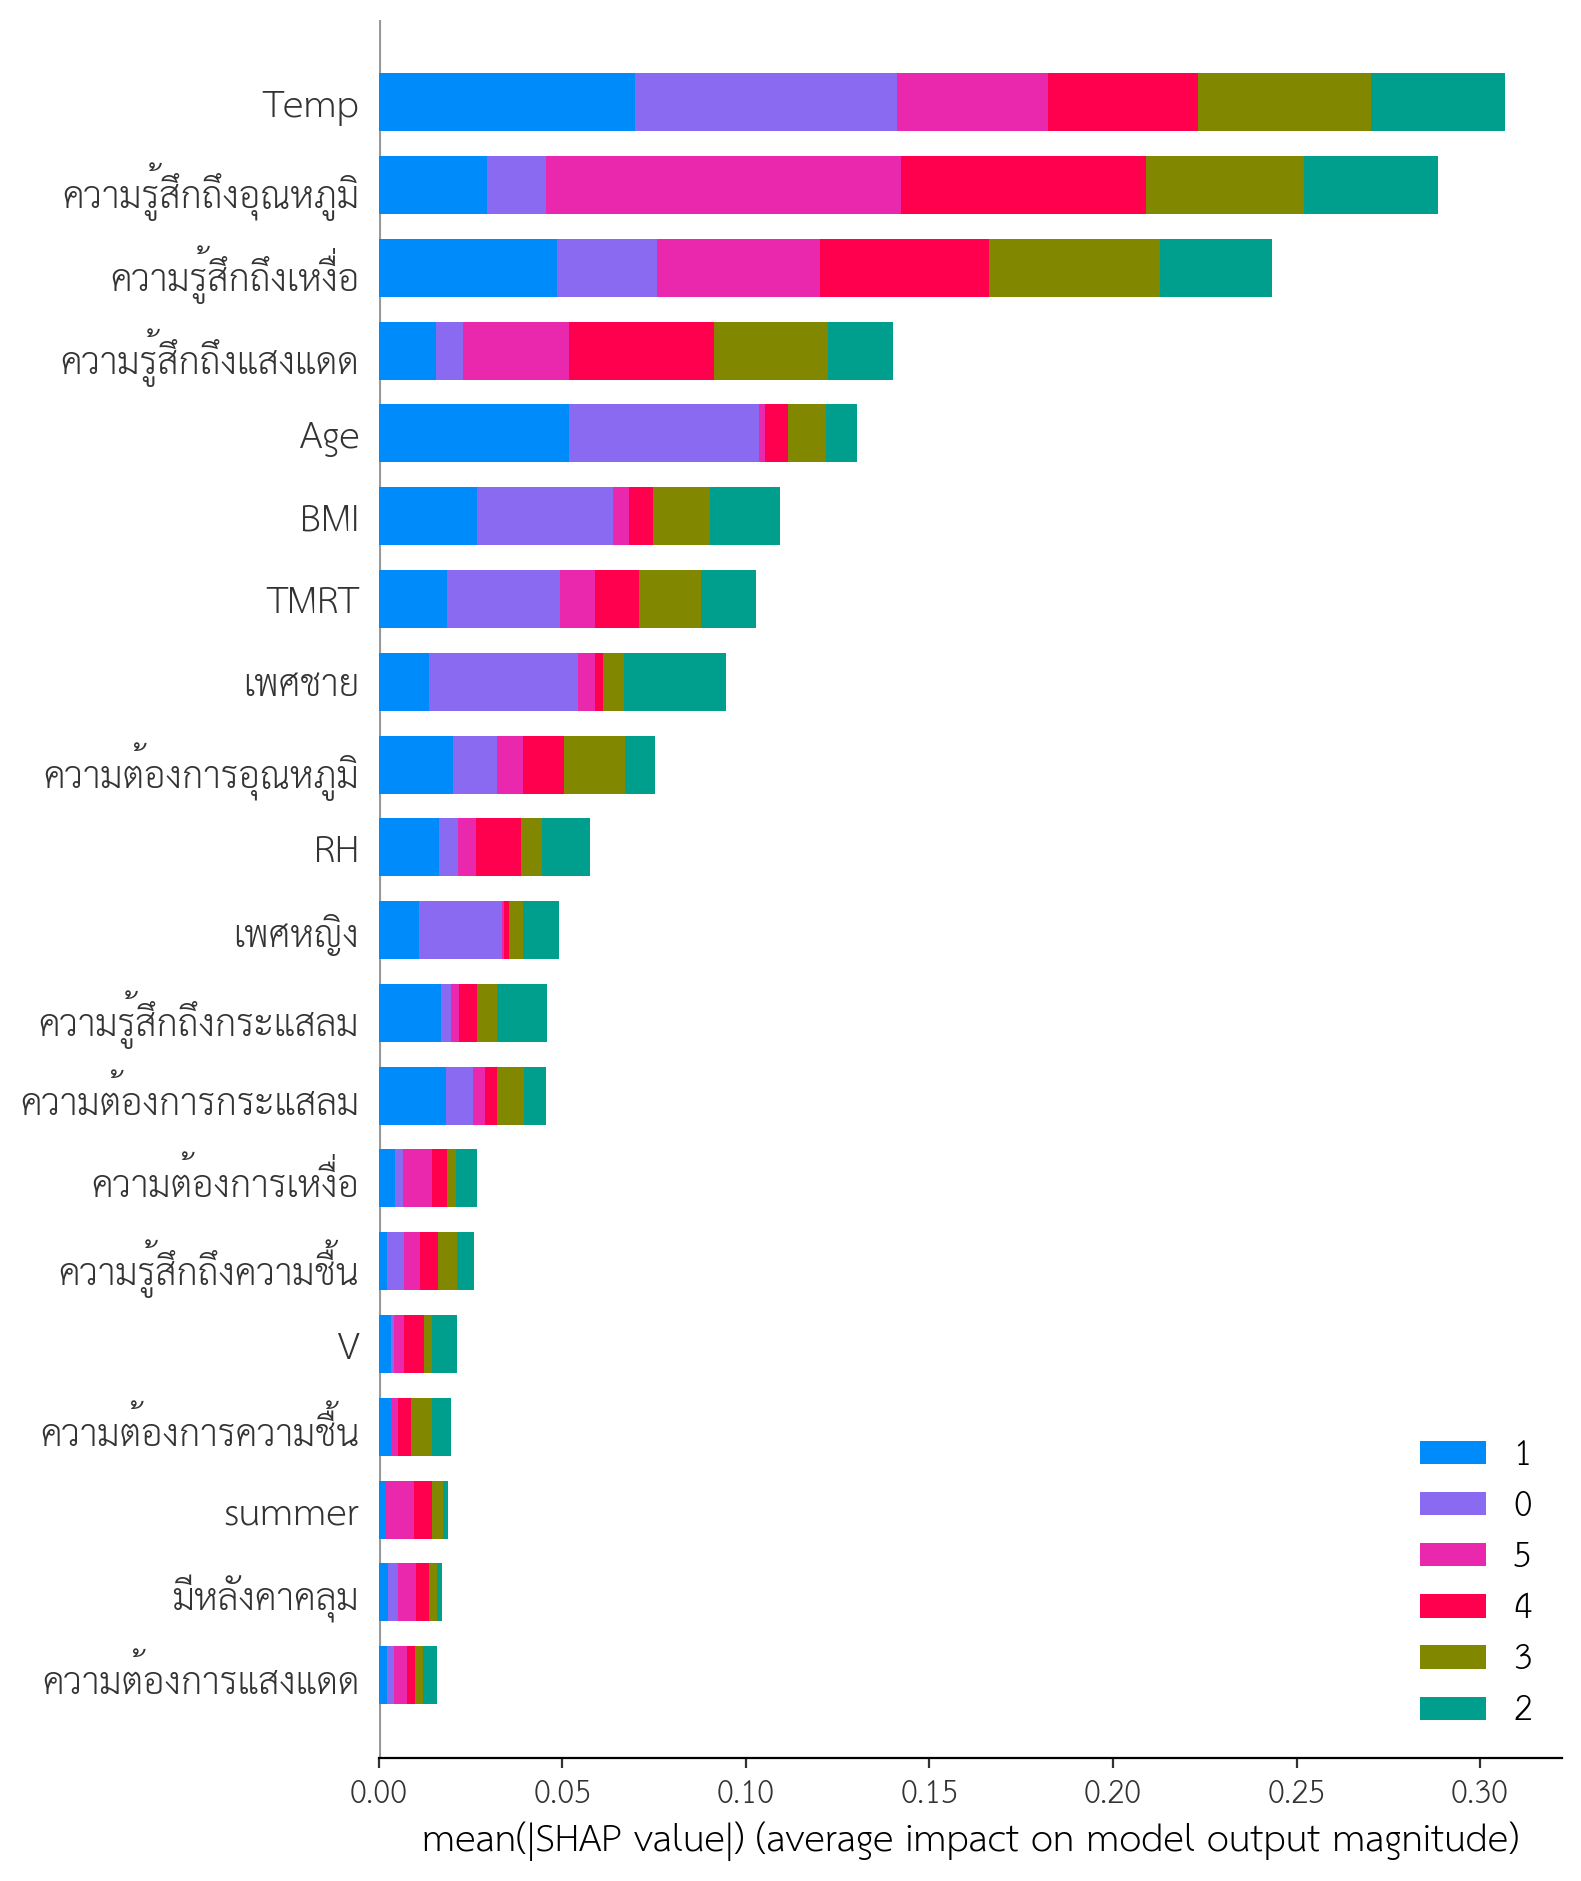

In [ ]:
# SHAP Interpreter
shapExplainer = shap.TreeExplainer(result)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_train_res.values, plot_type = 'bar', class_names= class_names, feature_names = X_train_res.columns)

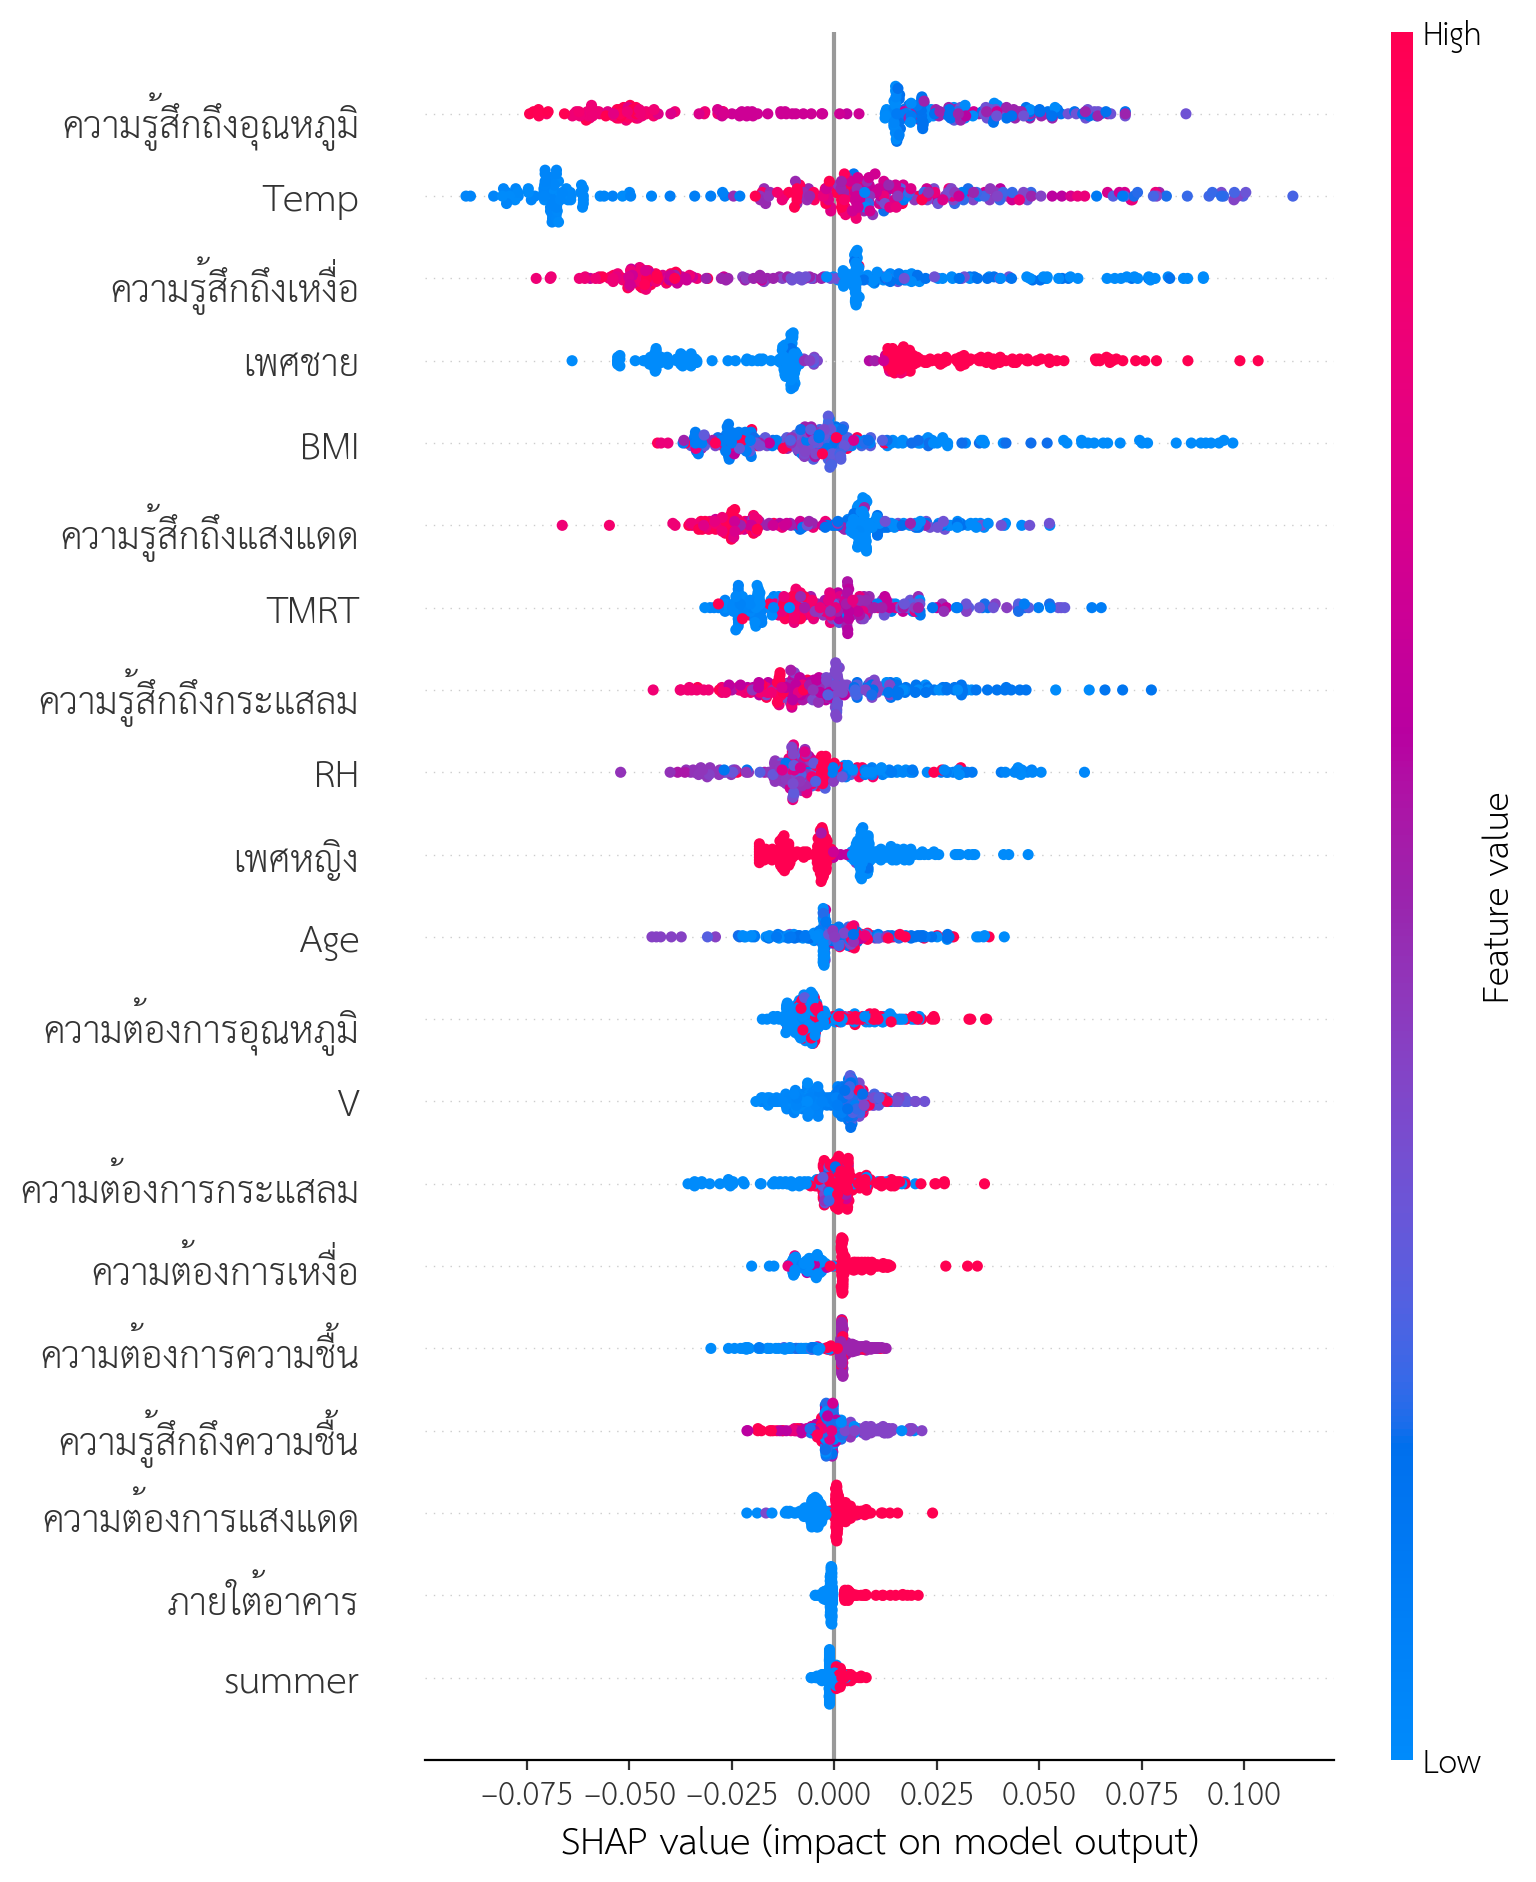

In [ ]:
shap.summary_plot(shapValues[2], X_train_res.values, feature_names = X_train_res.columns)

#XGBoost 7-TSV

In [ ]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3],
              'n_estimators':[5,10,20,100],'subsample': [0.3, 0.5, 1]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(X_train_res, y2_train_res)
print("best_params :",xgb_grid.best_params_)
print("accuracy :",xgb_grid.best_score_)

best_params : {'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 5, 'subsample': 0.3}
accuracy : 1.0


In [ ]:
xgb = XGBClassifier(learning_rate= 0.05, max_depth= 5, min_child_weight= 1, n_estimators= 5,subsample=0.3)

result = xgb.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = xgb.predict(X_test_scaled)
print(confusion_matrix(y2_test,y_pred))
print(classification_report(y2_test,y_pred))

[[0 0 0 0 0 0]
 [1 5 1 1 1 0]
 [0 3 2 4 1 1]
 [0 2 0 5 2 0]
 [0 0 0 1 2 2]
 [0 0 0 0 0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      0.56      0.53         9
           2       0.67      0.18      0.29        11
           3       0.45      0.56      0.50         9
           4       0.33      0.40      0.36         5
           5       0.57      1.00      0.73         4

    accuracy                           0.47        38
   macro avg       0.42      0.45      0.40        38
weighted avg       0.52      0.47      0.45        38



Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


[19:06:25] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


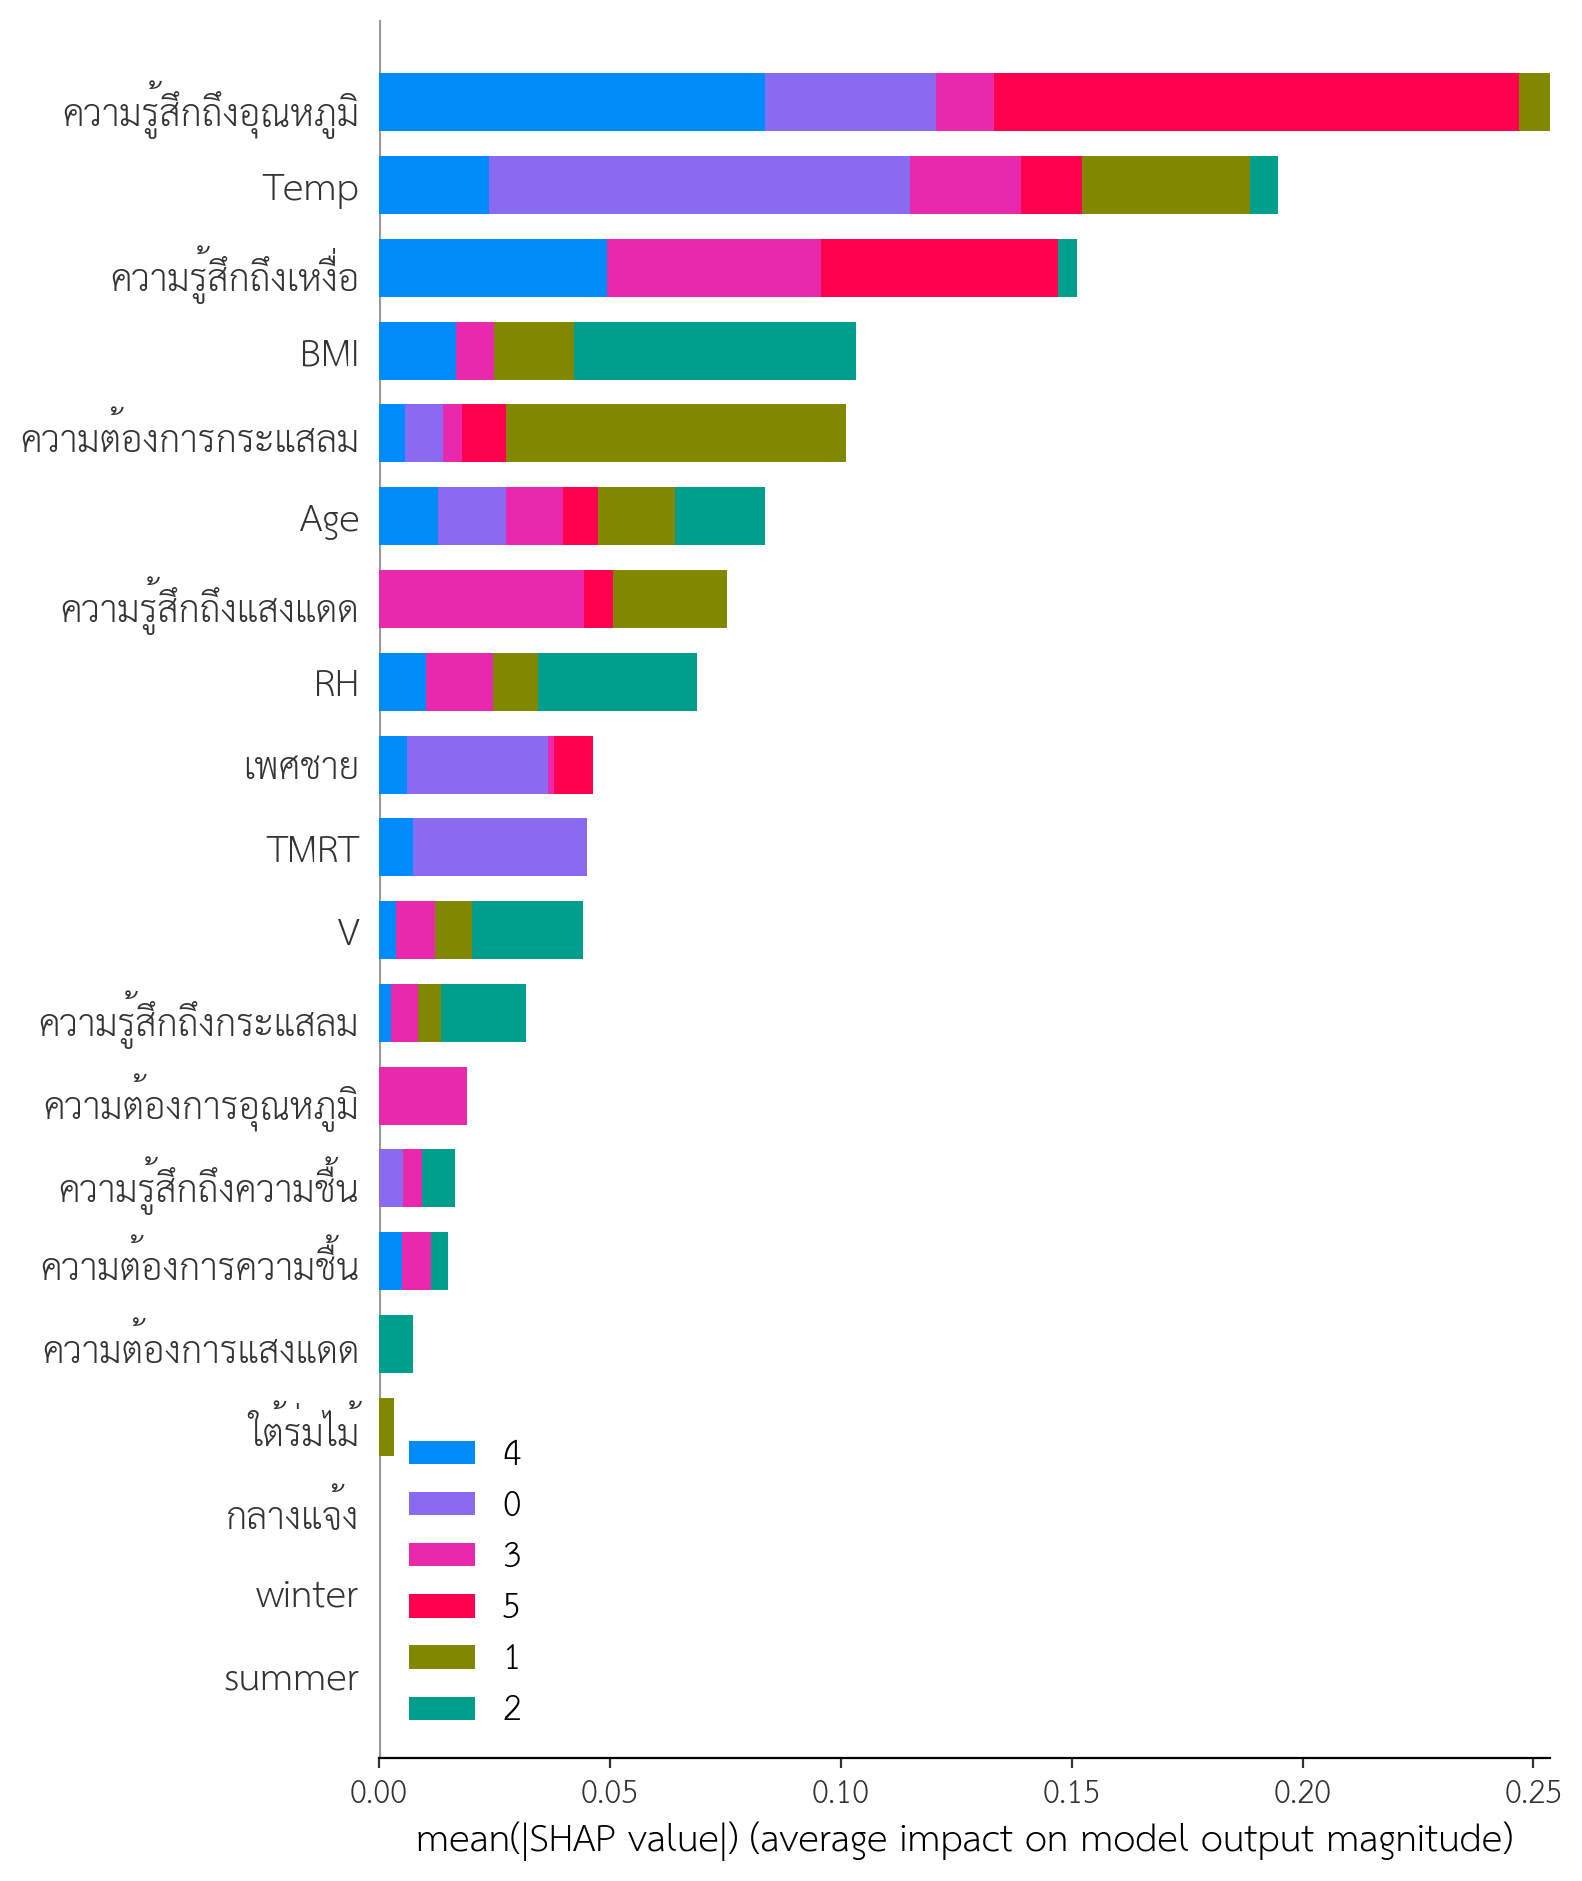

In [ ]:
# SHAP Interpreter
shapExplainer = shap.TreeExplainer(result)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_train_res.values, plot_type = 'bar', class_names= class_names, feature_names = X_train_res.columns)

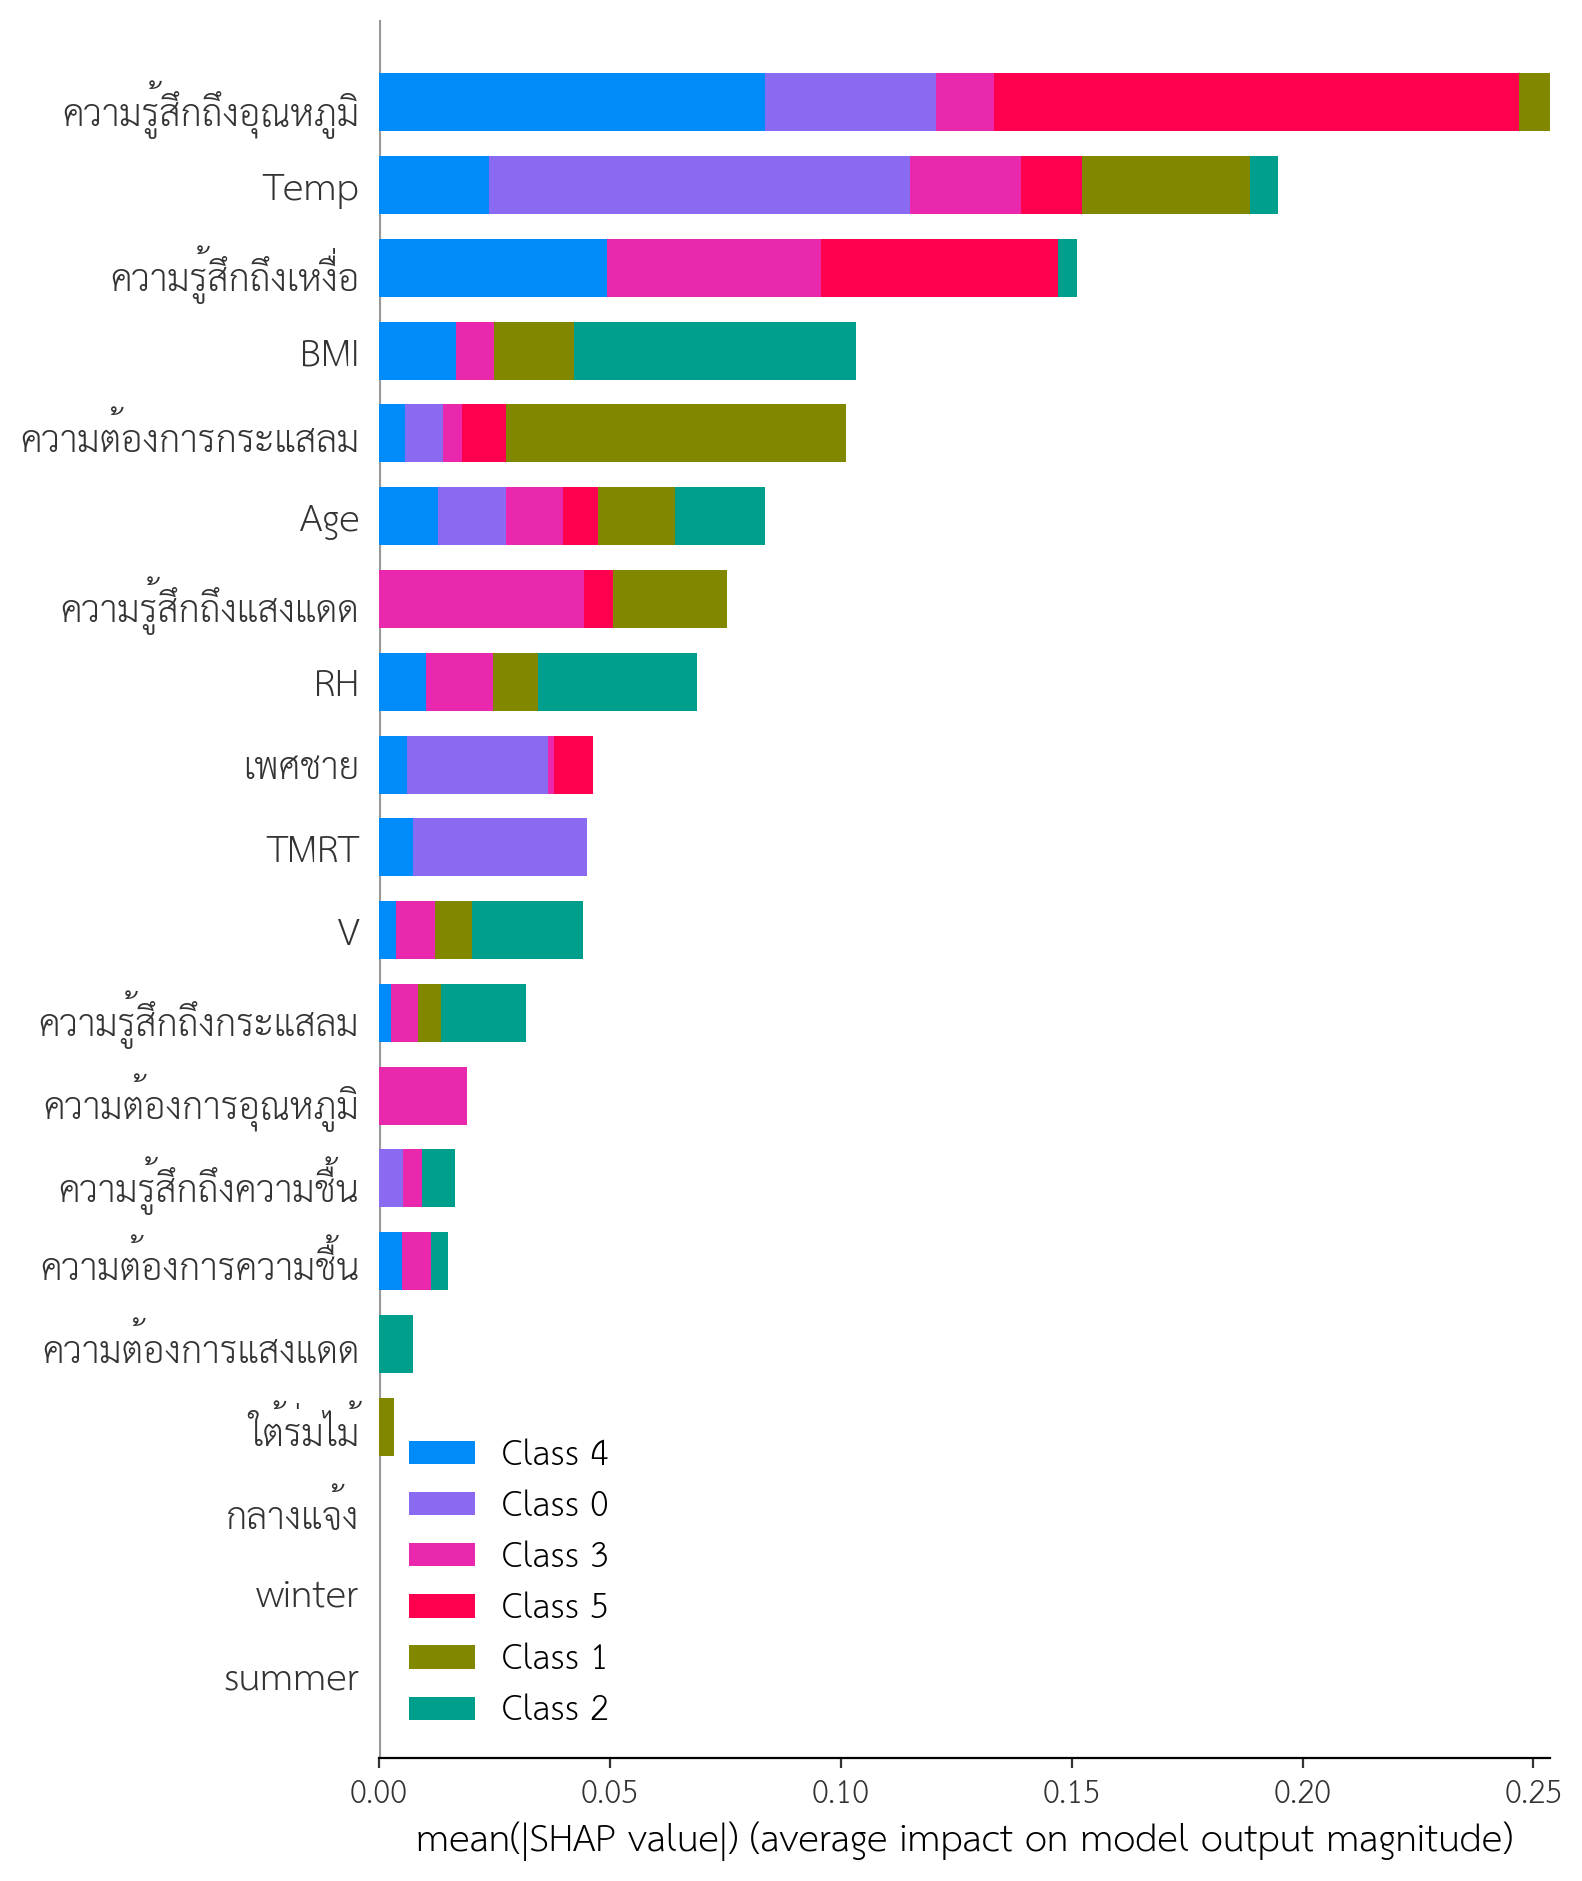

In [ ]:
shap.summary_plot(shapValues, X_train_res)

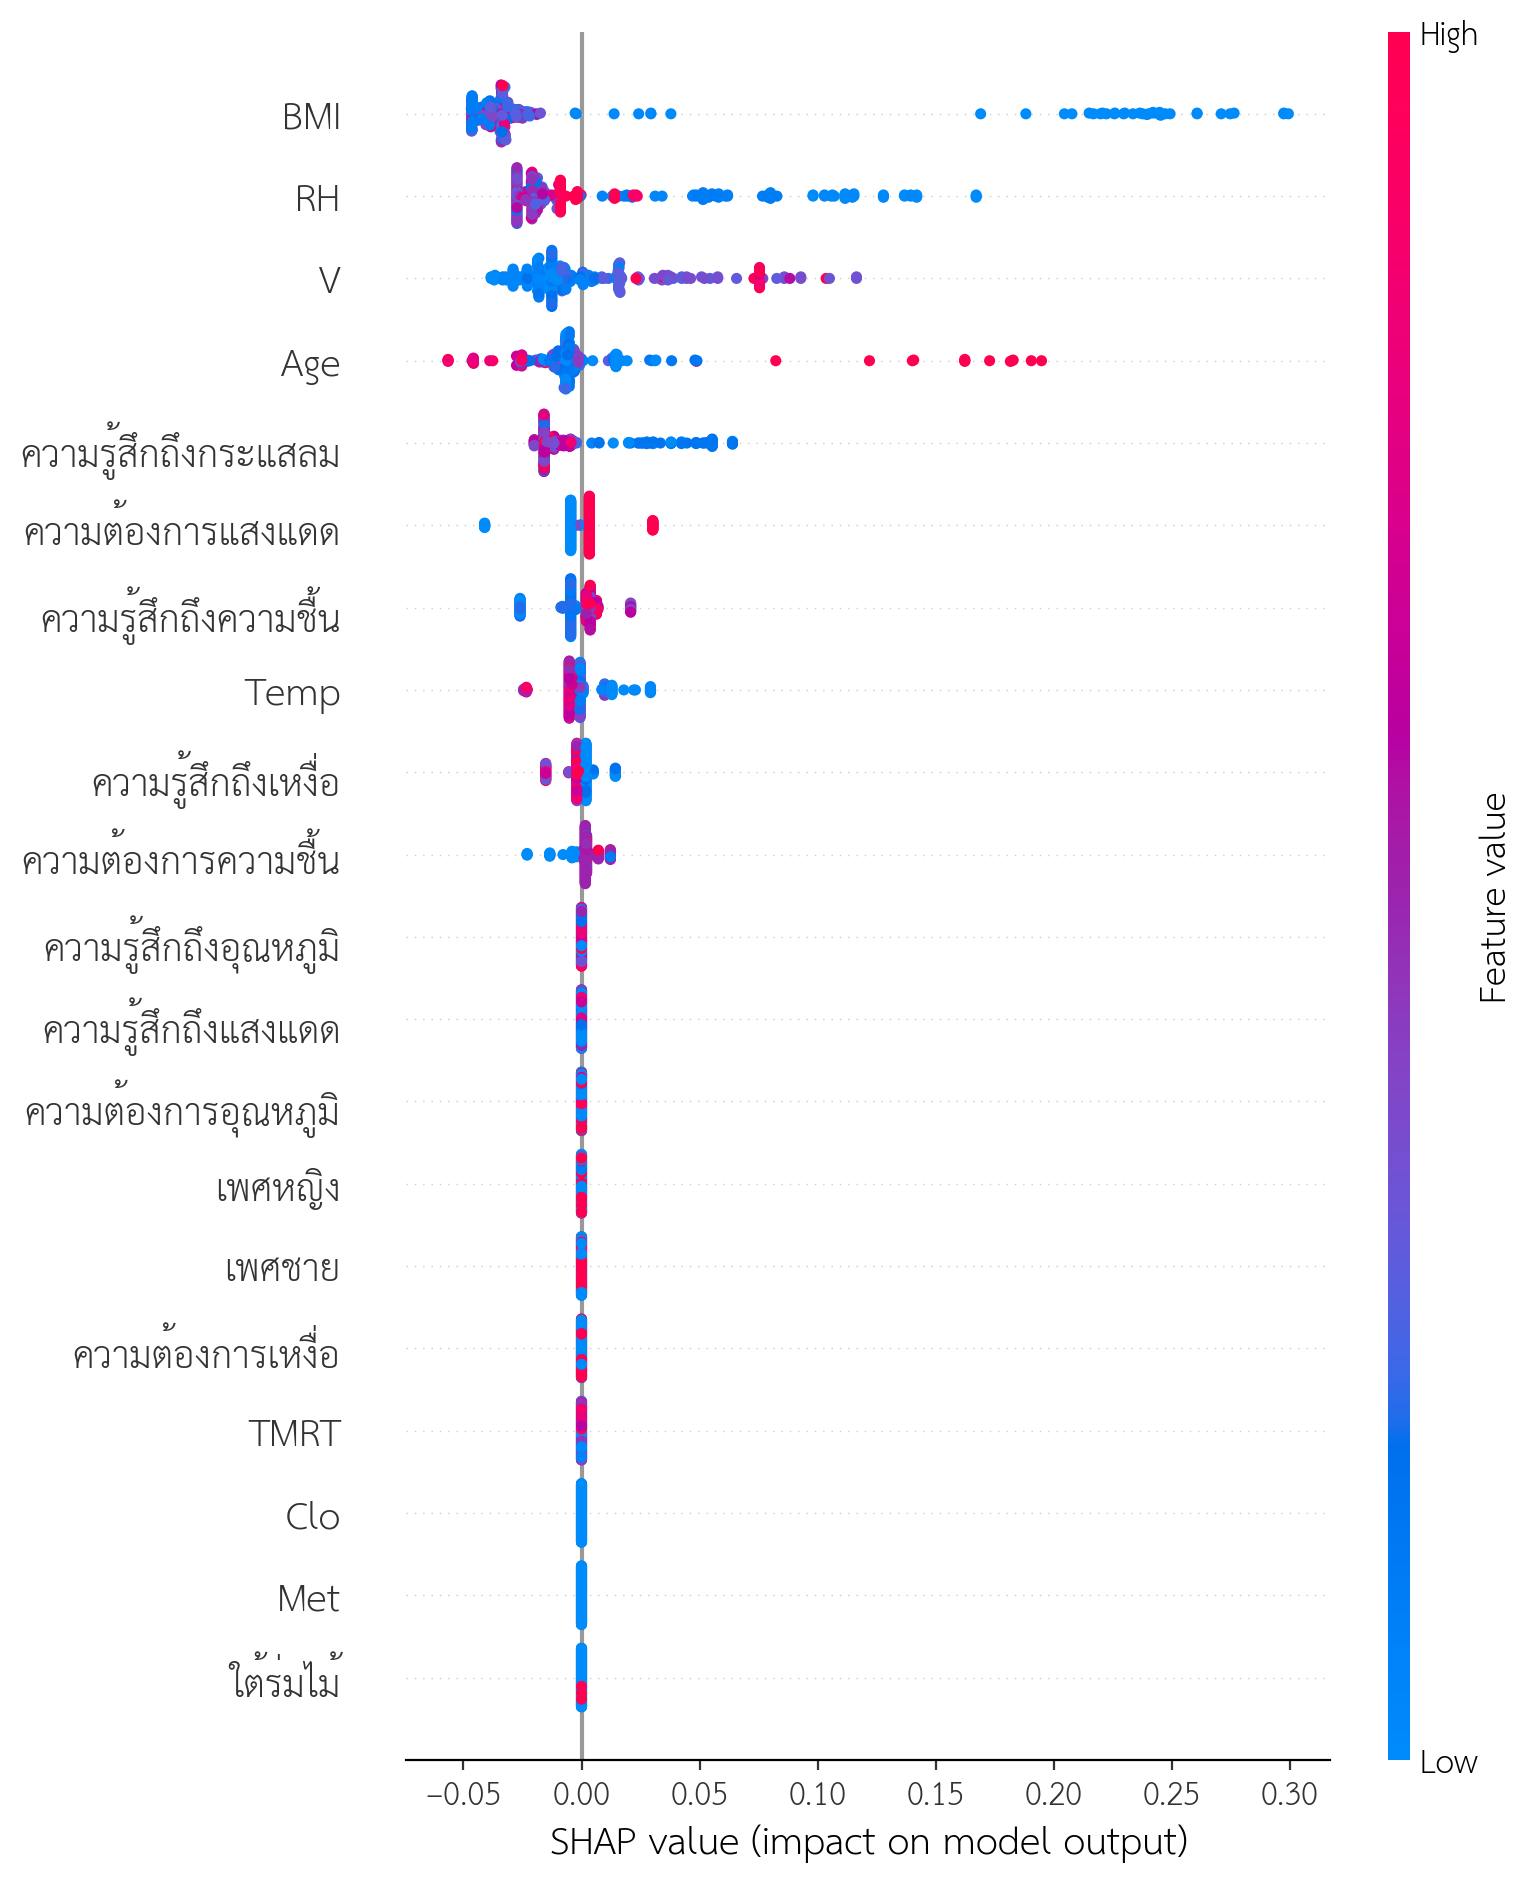

In [ ]:
shap.summary_plot(shapValues[2], X_train_res.values, feature_names = X_train_res.columns)

#SVC 7-TSV

In [ ]:
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svm_grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=0)
svm_grid.fit(X_train_res, y2_train_res)
print("best_params :",svm_grid.best_params_)
print("accuracy :",svm_grid.best_score_)



best_params : {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}
accuracy : 0.989534180278282


In [ ]:
svm = SVC(C= 100,gamma= 0.01, kernel='sigmoid')

svm.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)
print(confusion_matrix(y2_test,y_pred))
print(classification_report(y2_test,y_pred))

[[8 0 1 0 0]
 [3 3 4 1 0]
 [2 0 7 0 0]
 [0 0 2 1 2]
 [0 0 0 1 3]]
              precision    recall  f1-score   support

           1       0.62      0.89      0.73         9
           2       1.00      0.27      0.43        11
           3       0.50      0.78      0.61         9
           4       0.33      0.20      0.25         5
           5       0.60      0.75      0.67         4

    accuracy                           0.58        38
   macro avg       0.61      0.58      0.54        38
weighted avg       0.66      0.58      0.54        38



X does not have valid feature names, but SVC was fitted with feature names


AttributeError: coef_ is only available when using a linear kernel

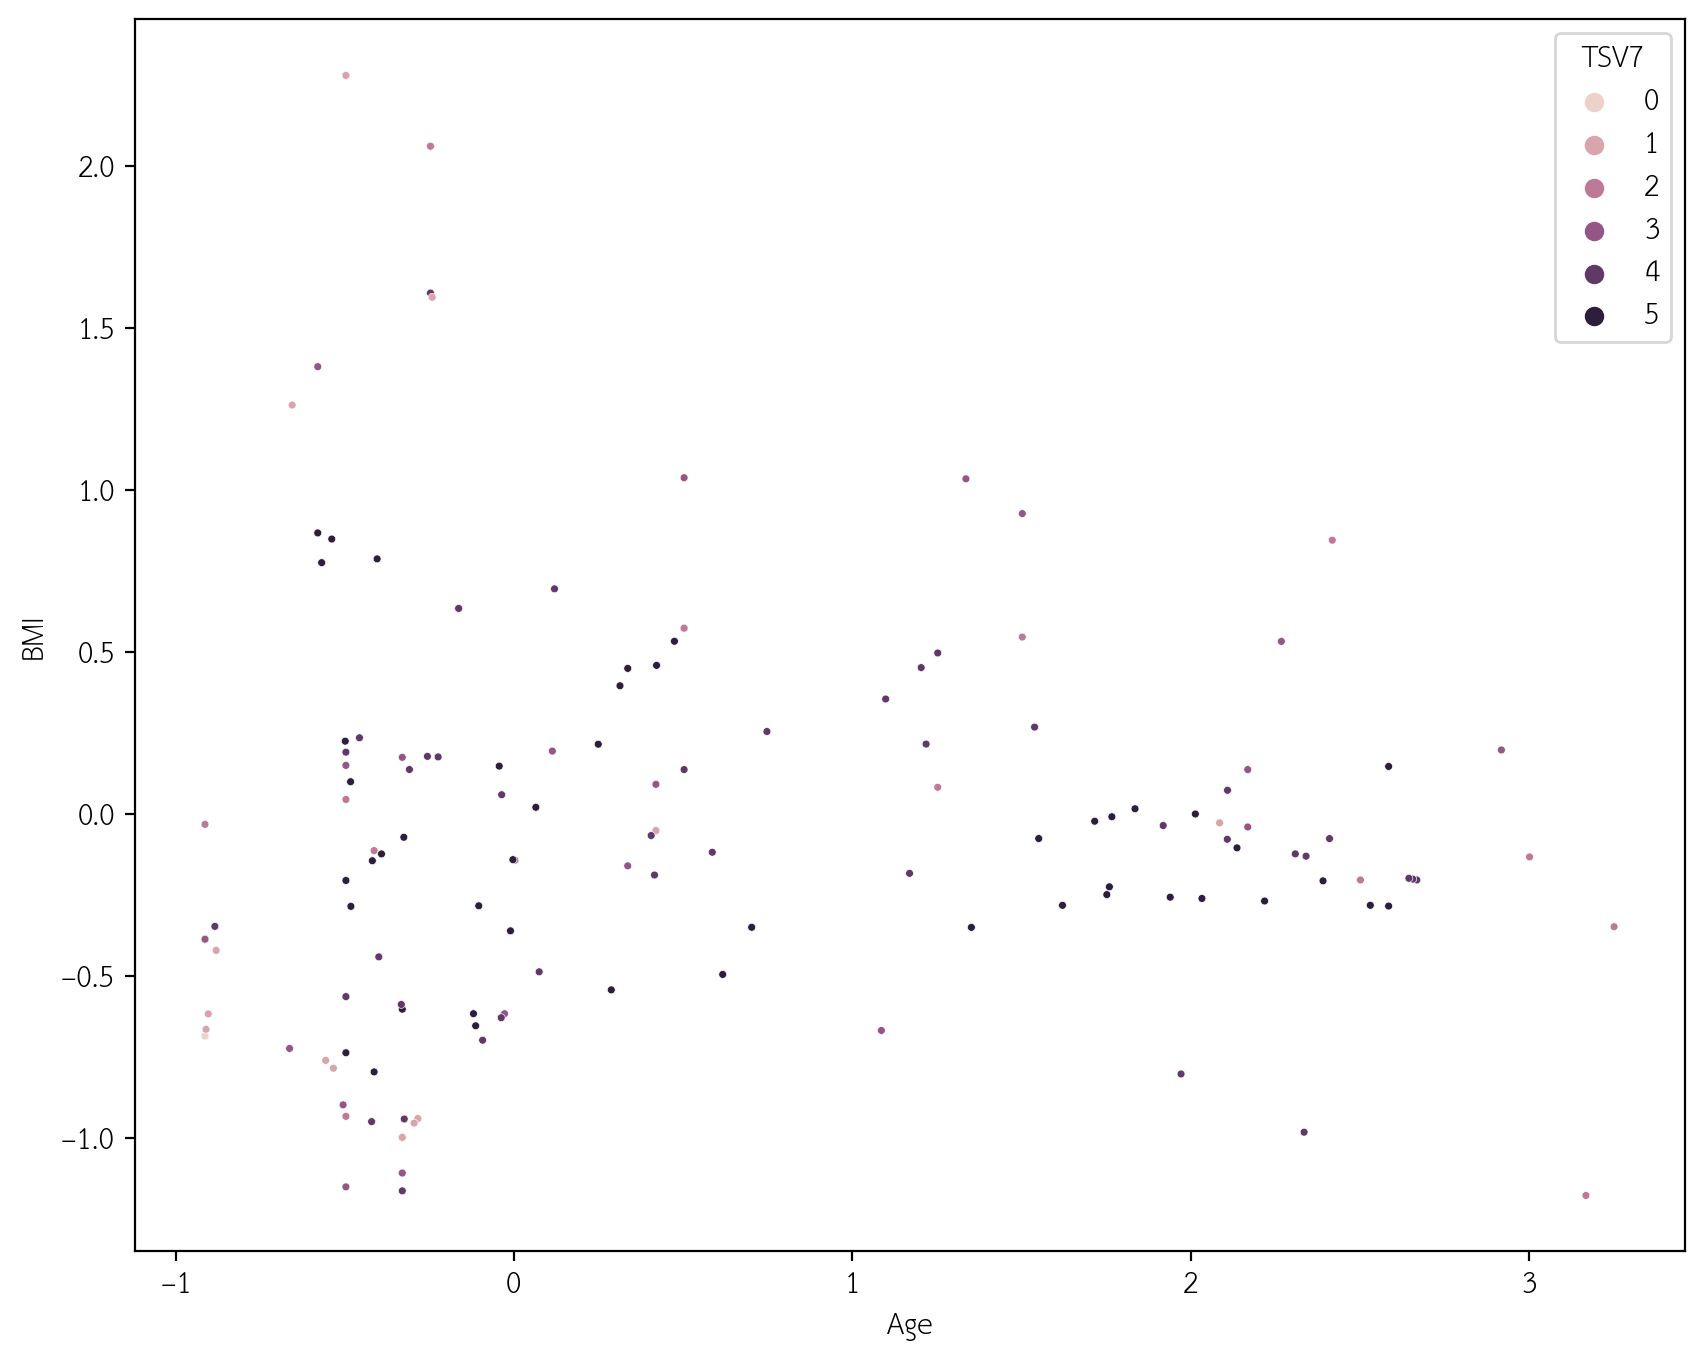

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train_res.iloc[:, 0],
                y=X_train_res.iloc[:, 1],
                hue=y2_train_res,
                s=8);
# Constructing a hyperplane using a formula.
w = svm.coef_[0]           # w consists of 2 elements
b = svm.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

AttributeError: coef_ is only available when using a linear kernel

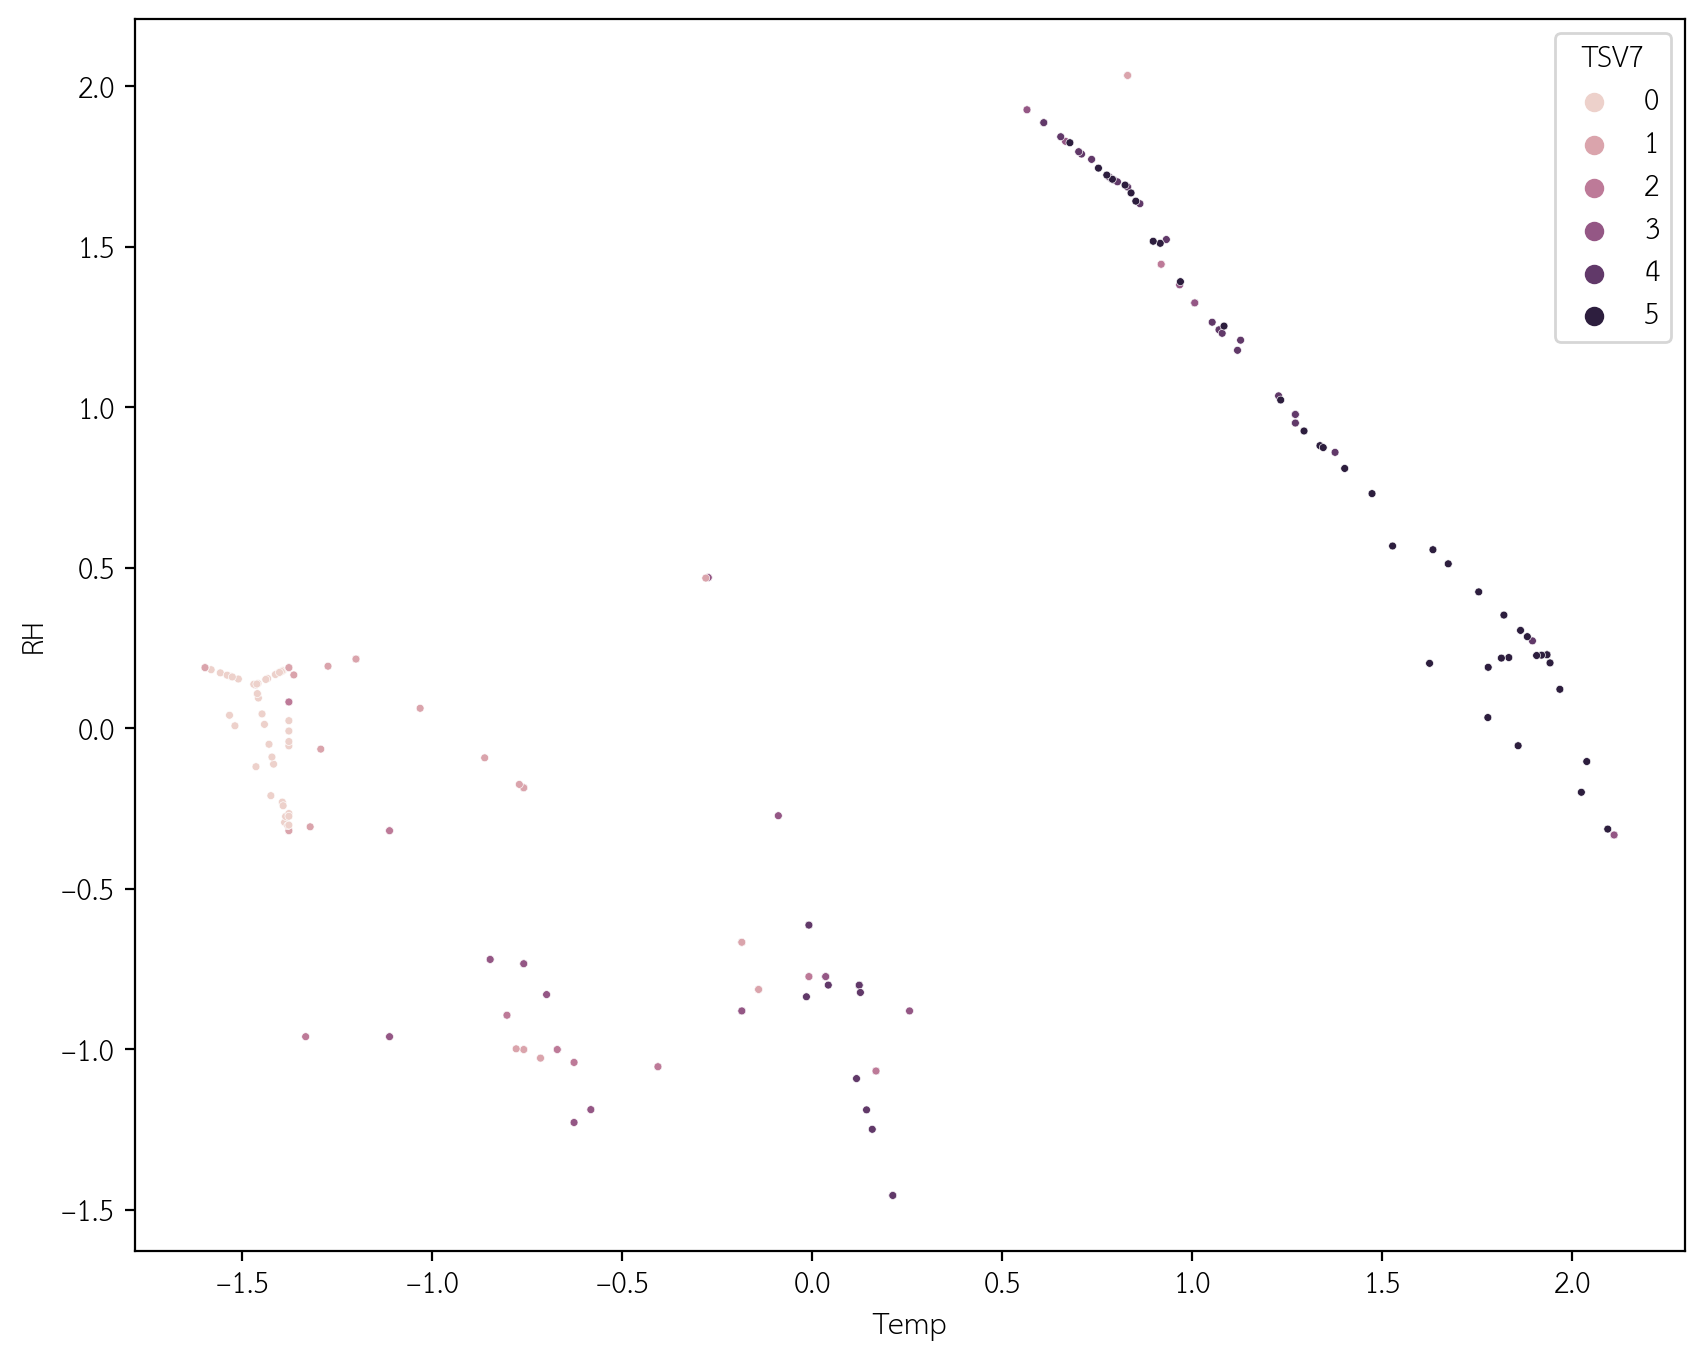

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train_res.iloc[:, 2],
                y=X_train_res.iloc[:, 3],
                hue=y2_train_res,
                s=8);
# Constructing a hyperplane using a formula.
w = svm.coef_[0]           # w consists of 2 elements
b = svm.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

AttributeError: coef_ is only available when using a linear kernel

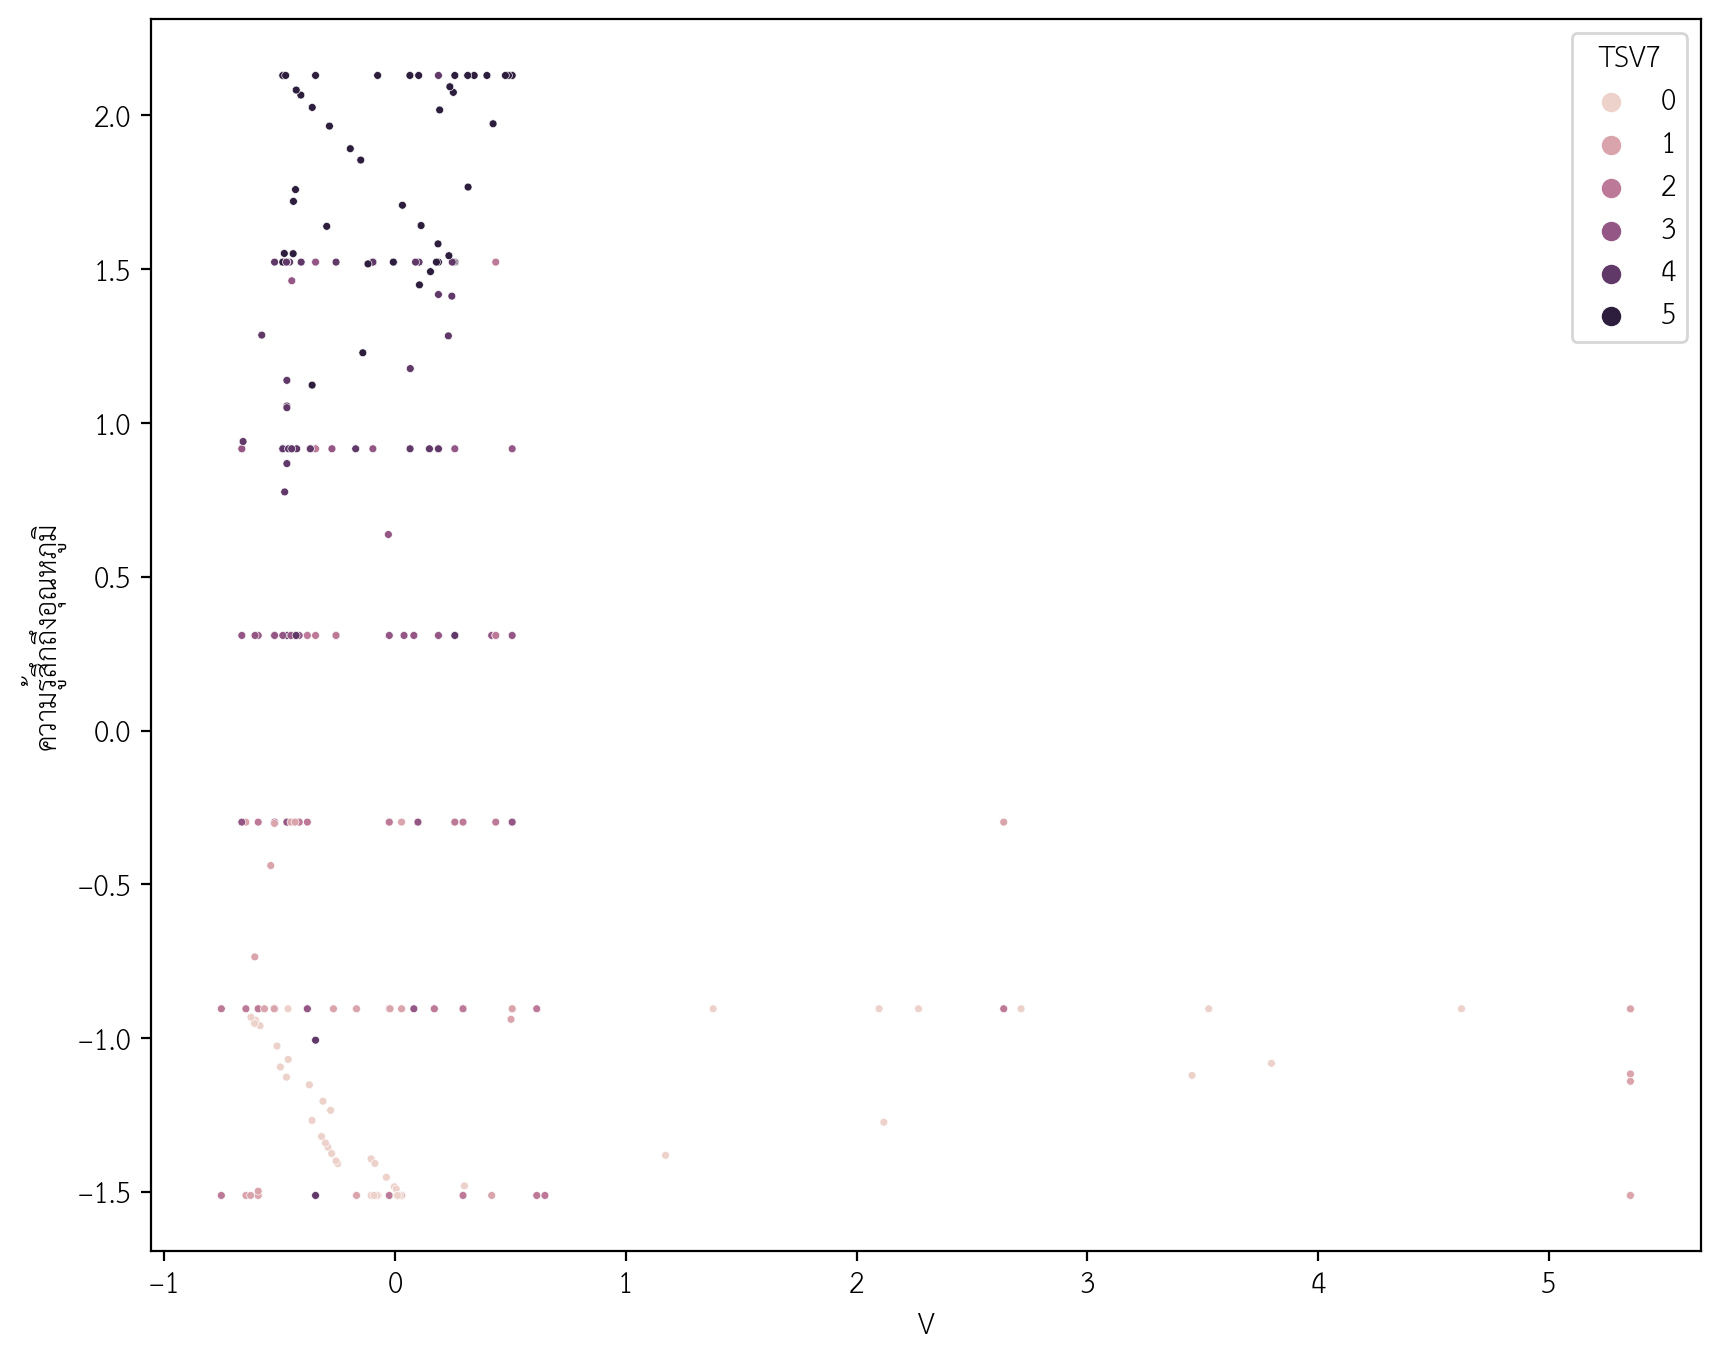

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train_res.iloc[:, 4],
                y=X_train_res.iloc[:, 5],
                hue=y2_train_res,
                s=8);
# Constructing a hyperplane using a formula.
w = svm.coef_[0]           # w consists of 2 elements
b = svm.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

AttributeError: coef_ is only available when using a linear kernel

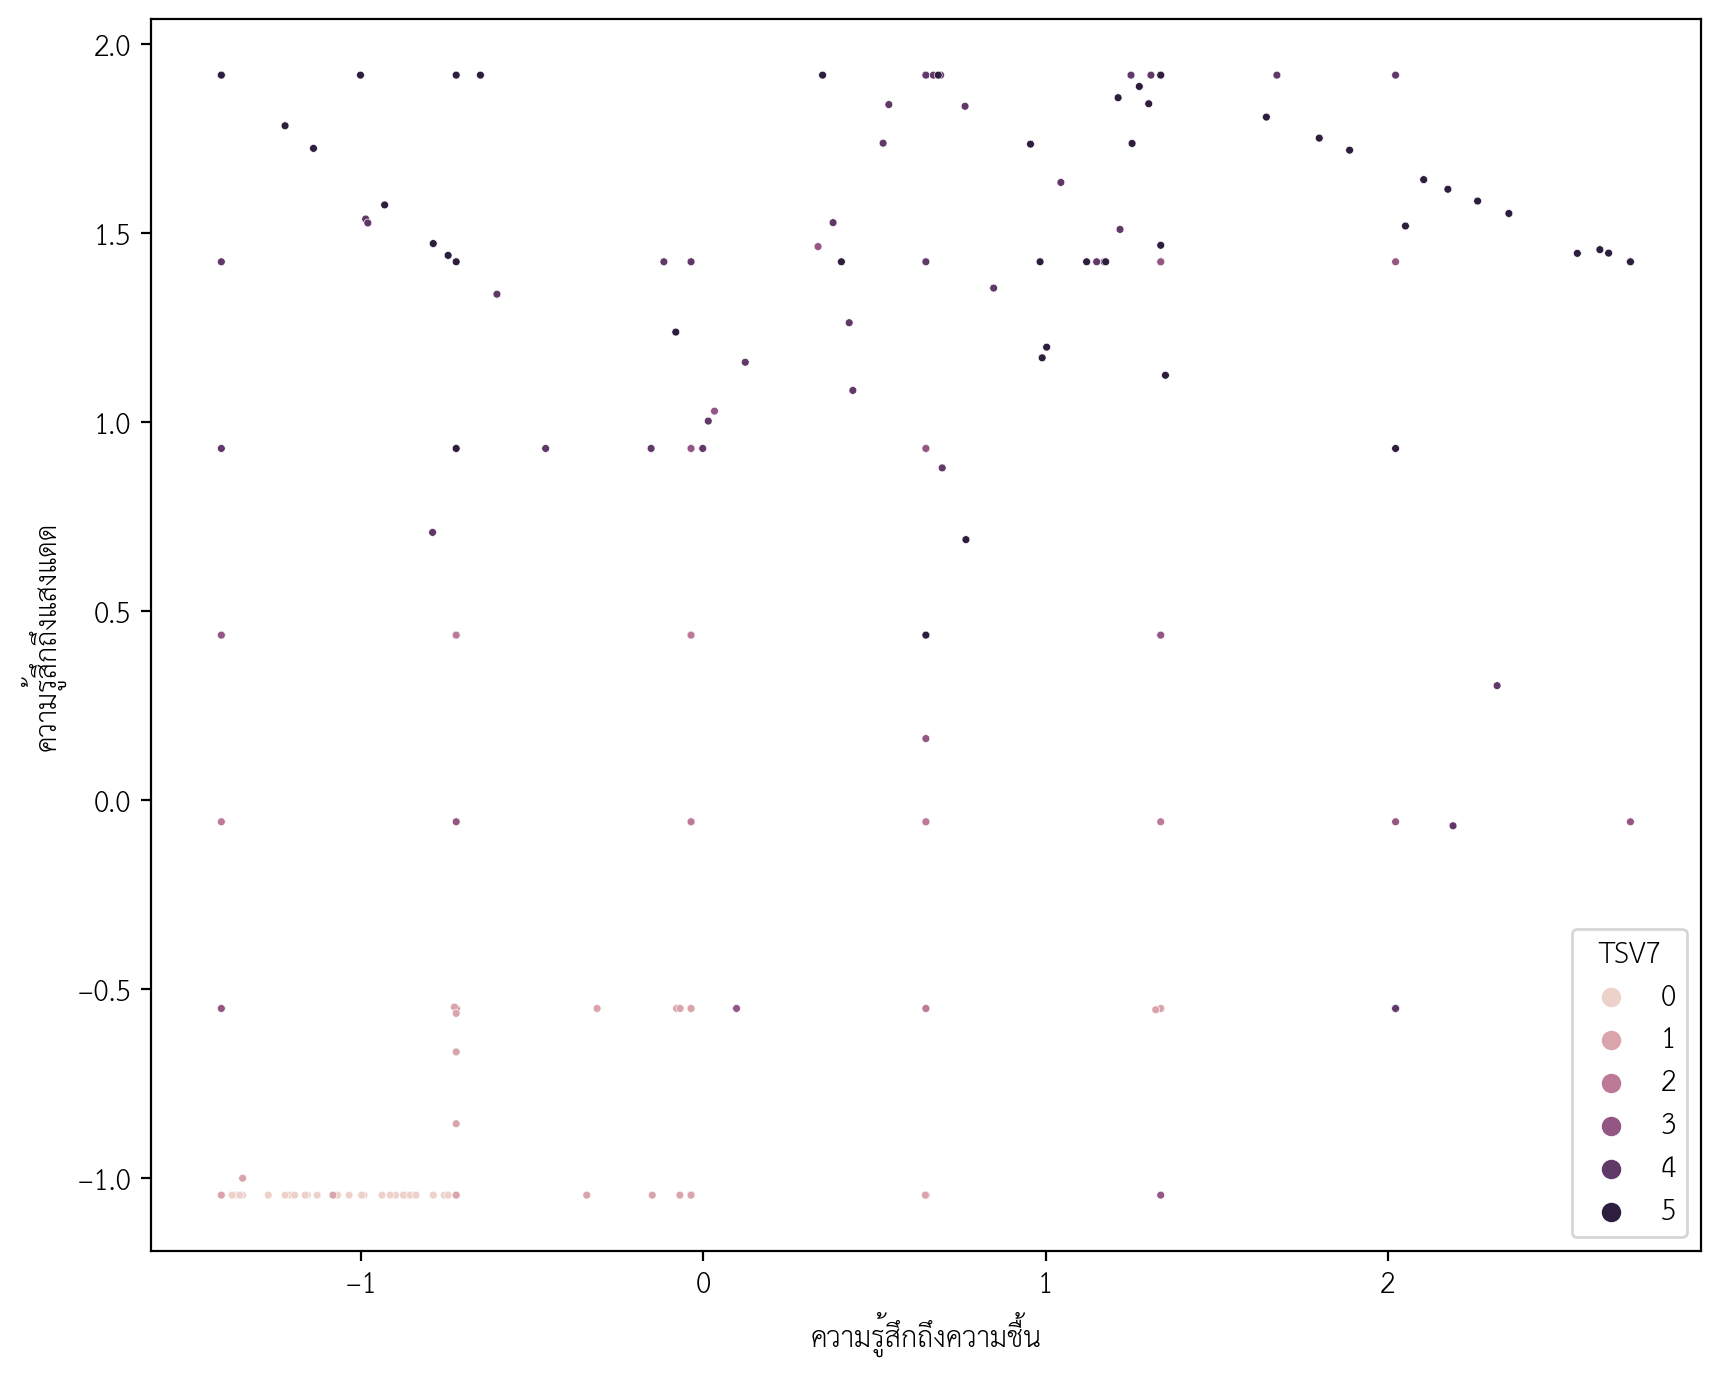

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train_res.iloc[:, 6],
                y=X_train_res.iloc[:, 8],
                hue=y2_train_res,
                s=8);
# Constructing a hyperplane using a formula.
w = svm.coef_[0]           # w consists of 2 elements
b = svm.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

AttributeError: coef_ is only available when using a linear kernel

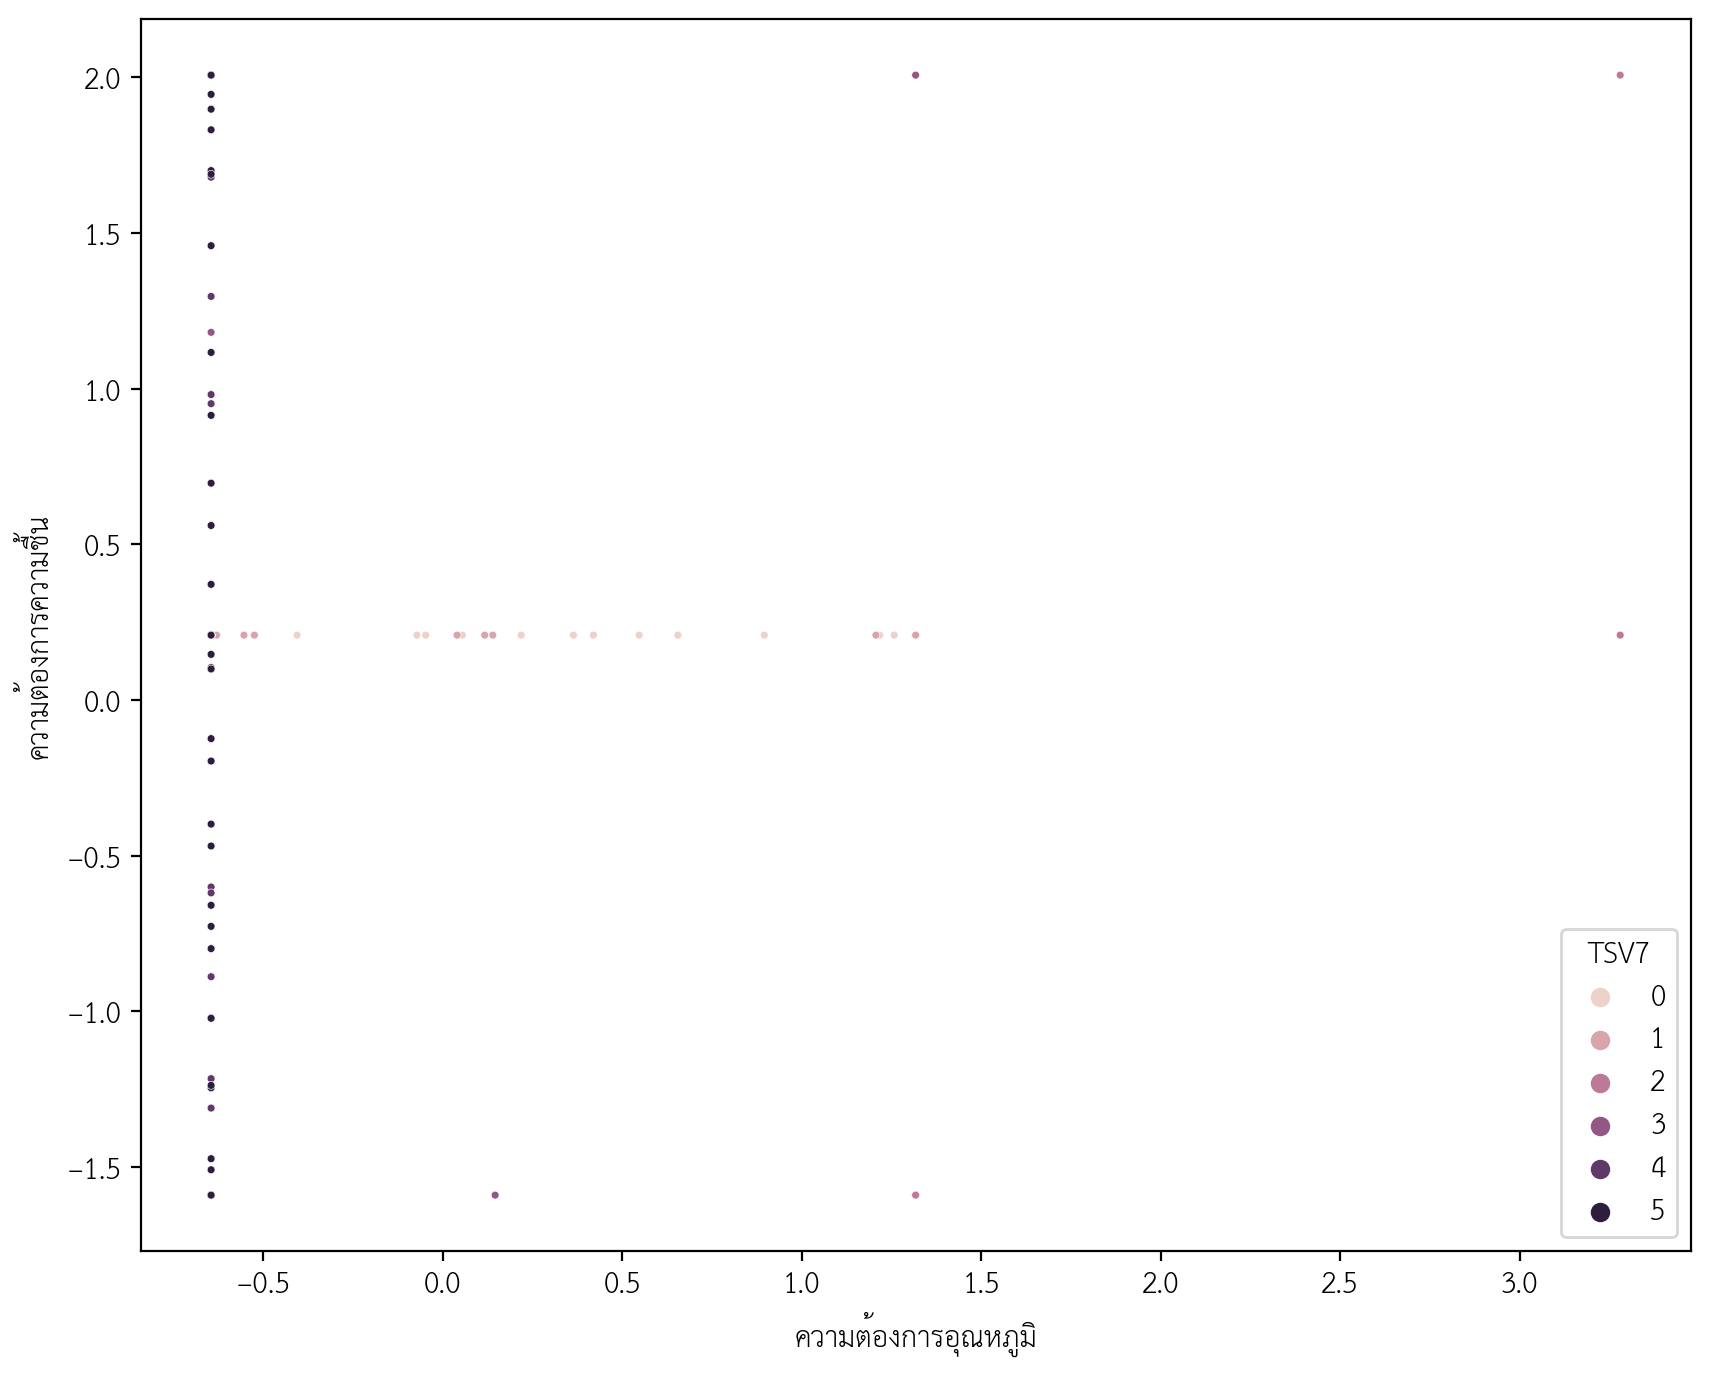

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train_res.iloc[:, 10],
                y=X_train_res.iloc[:, 11],
                hue=y2_train_res,
                s=8);
# Constructing a hyperplane using a formula.
w = svm.coef_[0]           # w consists of 2 elements
b = svm.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');